#Q1) Some question about data

> ## What range of minimum salaries can various sectors offer?



No handles with labels found to put in legend.


Text(0.5, 0.9, 'Range of minimum salaries in sectors')

findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.


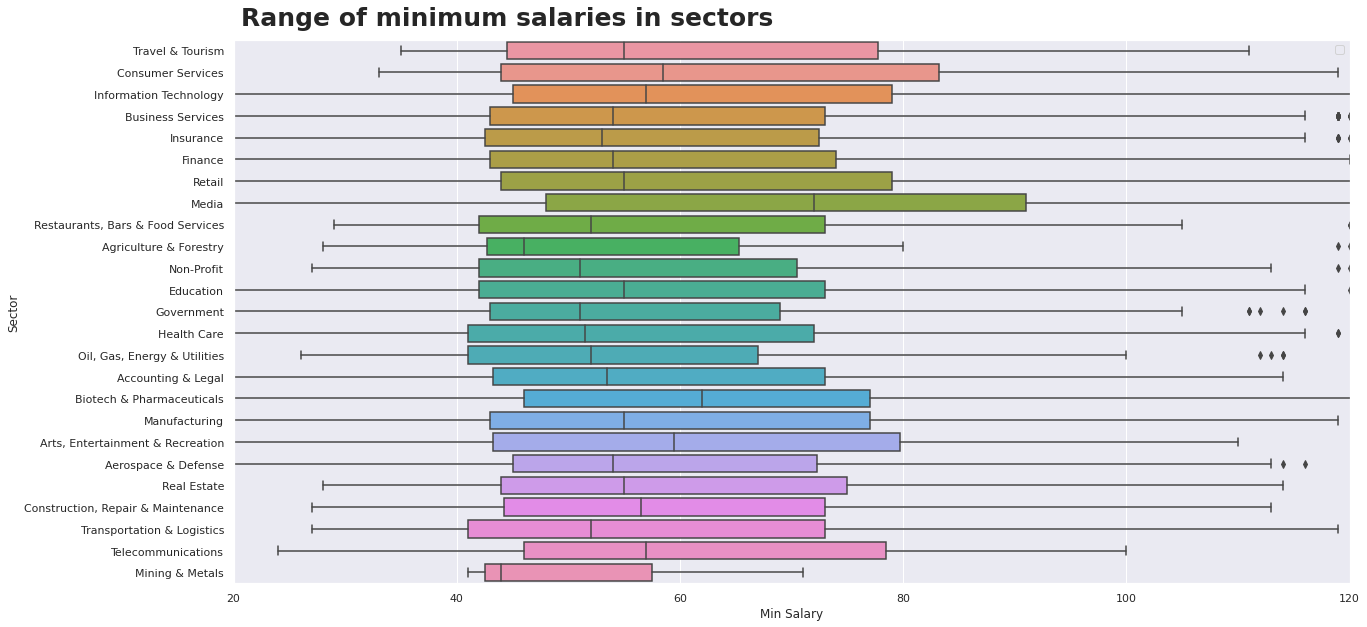

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(20, 120) #limit on x axis
ax = sns.boxplot(x=df['Min Salary'], y=df['Sector'])
ax.legend()
plt.figtext(.5,.9,"Range of minimum salaries in sectors", fontsize=25, fontweight='bold', fontname='helvetica', ha='right') #title formatting

> ## What range of maximum salaries can various sectors offer?

No handles with labels found to put in legend.


Text(0.5, 0.9, 'Range of maximum salaries in sectors')

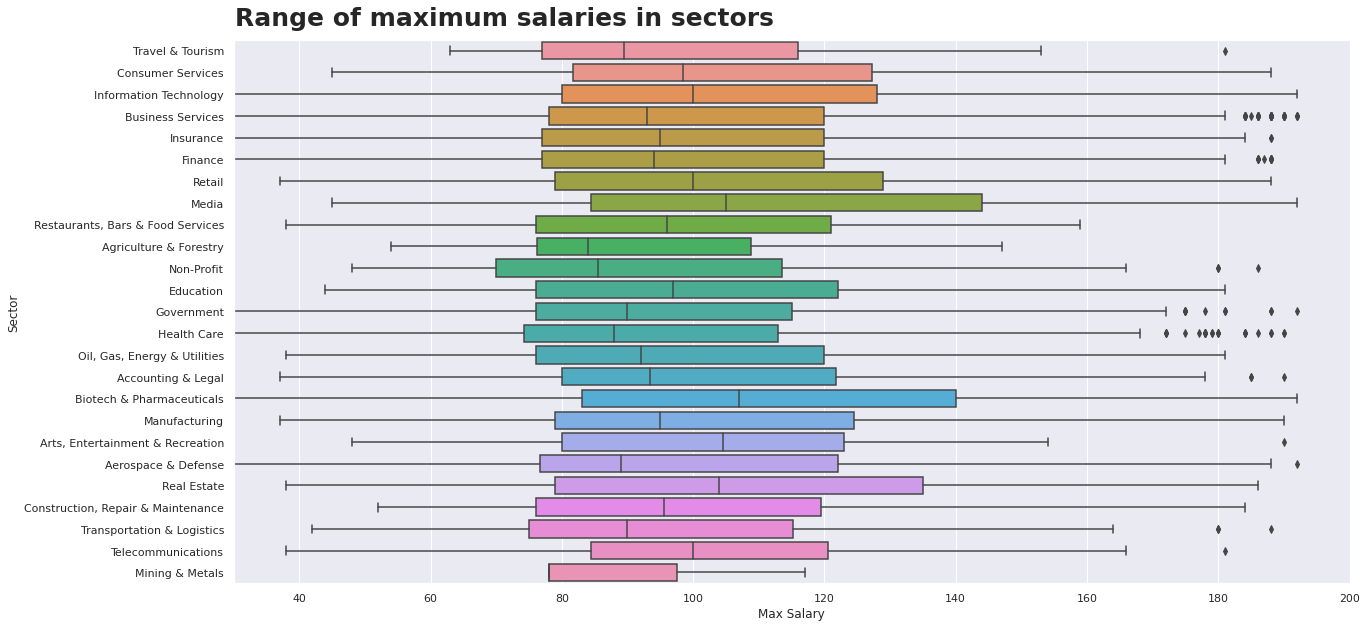

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(30, 200)
ax = sns.boxplot(x=df['Max Salary'], y=df['Sector'])
ax.legend().set_visible(False)

plt.figtext(.5,.9,"Range of maximum salaries in sectors", fontsize=25, fontweight='bold', fontname='helvetica', ha='right') #title formatting

> ## Which industries are in desperate need of data analysts?

In [ ]:
df_task_hungry_sectors = """SELECT Industry, COUNT(*) AS count
                    FROM df
                    GROUP BY Industry
                    ORDER BY count DESC
                    LIMIT 20"""
df_ind = ps.sqldf(df_task_hungry_sectors)
df_ind

Industry  count
0                               IT Services   4404
1                    Staffing & Outsourcing   1666
2              Computer Hardware & Software    921
3                                Consulting    884
4          Health Care Services & Hospitals    762
5   Enterprise Software & Network Solutions    541
6                                  Internet    534
7     Investment Banking & Asset Management    511
8                        Insurance Carriers    426
9                 Biotech & Pharmaceuticals    423
10                  Advertising & Marketing    331
11                      Aerospace & Defense    316
12                    Banks & Credit Unions    315
13                  Colleges & Universities    244
14                               Accounting    238
15                         Federal Agencies    181
16                                  Lending    154
17                   Research & Development    111
18     Architectural & Engineering Services    108
19                        Social Assistance     86

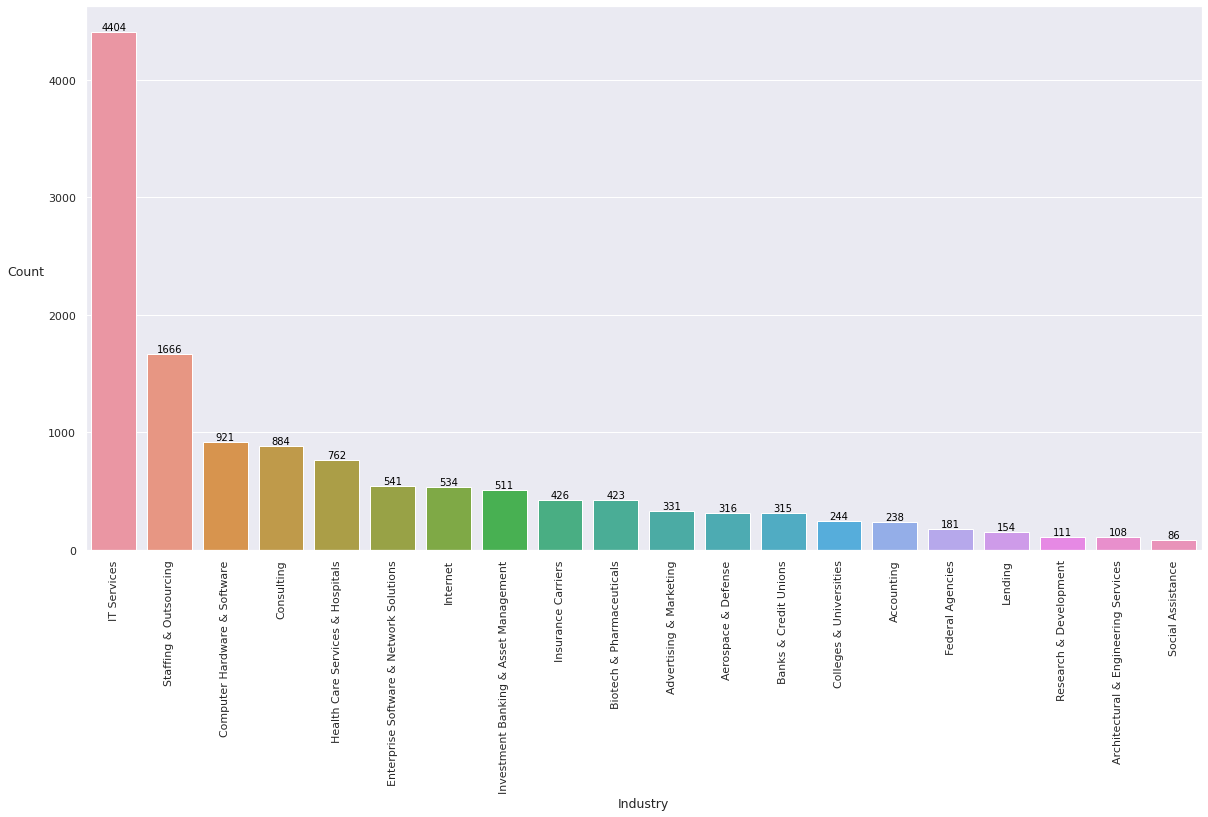

In [ ]:
plt.figure(figsize=(20,10)) #figsize must be applied before plotting the graph
plt.xticks(rotation='vertical') #text rotation for readability
plot_needed_ind = sns.barplot(x=df['Industry'].value_counts().head(20).index, y=df['Industry'].value_counts().head(20).values)

plt.xlabel('Industry', fontsize=12.5)
plt.ylabel('Count', rotation=0, ha='right', fontsize=12.5)

for patch in plot_needed_ind.patches:
    plot_needed_ind.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

> ## Which cities have the most DA positions available?

In [ ]:
df_task_city = """SELECT City, COUNT(*) AS Job_count
                    FROM df
                    GROUP BY City
                    ORDER BY Job_count DESC
                    LIMIT 20"""
ps.sqldf(df_task_city)

City  Job_count
0        New York       1066
1          Austin        989
2         Chicago        914
3         Houston        823
4       San Diego        811
5     San Antonio        755
6    Jacksonville        616
7    Philadelphia        565
8          Dallas        527
9         Phoenix        525
10    Los Angeles        504
11         Irving        319
12       San Jose        220
13          Tempe        199
14     Washington        196
15       Columbus        190
16          Plano        176
17     Fort Worth        156
18  San Francisco        155
19      Sunnyvale        136

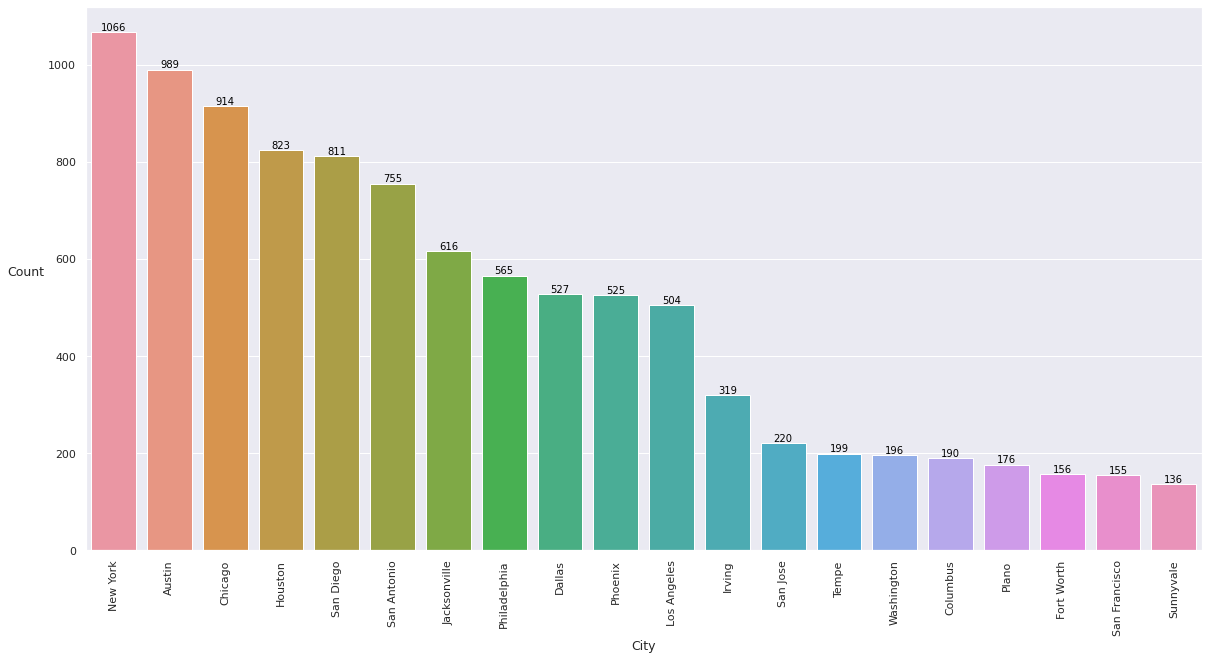

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical') #text rotation for readability

plot_city = sns.barplot(x=df['City'].value_counts().head(20).index, y=df['City'].value_counts().head(20).values)
plt.xlabel('City', fontsize=12.5)
plt.ylabel('Count', rotation=0, ha='right', fontsize=12.5)

for patch in plot_city.patches:
             plot_city.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.show()

#Q1) hypothesis test Question

> ## The highest salary offerd is more than `$190K`

#Q2)

##Pip Instal

In [ ]:
#install some packages
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install pandasql

     |████████████████████████████████| 50 kB 3.5 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149862 sha256=456ee7066fdf972300f40c561d4ba3ce0cf1a230831ef1cec4f75f222ca8c148
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=5a8a67e330993e220b7f7b239716181af3cf98b2d64fd6e7eb322b30cd2e2a0d
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


##Import Libraries

In [ ]:
# Step 1: Import needed libraries. E.g., pandas, missingno, and sklearn
import pandas as pd
import numpy as np
from scipy import stats
import pandasql as ps 
#for plots
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import fuzzywuzzy
from fuzzywuzzy import process
import chardet

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder  #for encode the categorical data

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.impute import KNNImputer

#split the data
from sklearn.model_selection import train_test_split

#models Evaluations and reports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

#ML models 
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

##Read The dataset

In [ ]:
#load the data from my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# TODO for Task 1, put your code here to perform data type and data scale check
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DEBI/Queens/DA/Assignment_1/data1.csv")

# check the first five rows of the training data
df

Job Title               Salary Estimate  \
0                  Senior Data Scientist  $111K-$181K (Glassdoor est.)   
1      Data Scientist, Product Analytics  $111K-$181K (Glassdoor est.)   
2                   Data Science Manager  $111K-$181K (Glassdoor est.)   
3                           Data Analyst  $111K-$181K (Glassdoor est.)   
4                 Director, Data Science  $111K-$181K (Glassdoor est.)   
...                                  ...                           ...   
16155                     Cloud Engineer   $76K-$128K (Glassdoor est.)   
16156                Electrical Engineer   $76K-$128K (Glassdoor est.)   
16157              Sr. Big Data Engineer   $76K-$128K (Glassdoor est.)   
16158     Senior Big Data / ETL Engineer   $76K-$128K (Glassdoor est.)   
16159                     Cloud Engineer   $76K-$128K (Glassdoor est.)   

                                         Job Description  Rating  \
0      ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1      At Noom, we use scientifically proven methods ...     4.5   
2      Decode_M\n\nhttps://www.decode-m.com/\n\nData ...    -1.0   
3      Sapphire Digital seeks a dynamic and driven mi...     3.4   
4      Director, Data Science - (200537)\nDescription...     3.4   
...                                                  ...     ...   
16155  The Expertise You Have Proven expertise in dev...     4.5   
16156  Lockheed Martin is seeking a Circuit and FPGA ...     2.9   
16157  Posting Title Principal Data Engineer (Contrac...     3.7   
16158  Your Opportunity\n\nCharles Schwab & Co., Inc ...     3.5   
16159  Cloud Engineer Westlake, TX 6+ months Descript...     3.6   

                                    Company Name        Location  \
0                                    Hopper\n3.5    New York, NY   
1                                   Noom US\n4.5    New York, NY   
2                                       Decode_M    New York, NY   
3                          Sapphire Digital\n3.4   Lyndhurst, NJ   
4                United Entertainment Group\n3.4    New York, NY   
...                                          ...             ...   
16155                            PMG Global\n4.5    Westlake, TX   
16156            Albin Engineering Services\n2.9  Fort Worth, TX   
16157  Cincinnati Bell Technology Solutions\n3.7      Irving, TX   
16158                                Schwab\n3.5    Westlake, TX   
16159        SPECTRAFORCE TECHNOLOGIES Inc.\n3.6    Westlake, TX   

              Headquarters                    Size  Founded  \
0         Montreal, Canada   501 to 1000 employees     2007   
1             New York, NY  1001 to 5000 employees     2008   
2             New York, NY       1 to 50 employees       -1   
3            Lyndhurst, NJ    201 to 500 employees     2019   
4             New York, NY     51 to 200 employees     2007   
...                    ...                     ...      ...   
16155          Herndon, VA       1 to 50 employees       -1   
16156      Santa Clara, CA     51 to 200 employees     1993   
16157       Cincinnati, OH   501 to 1000 employees       -1   
16158  Dettenheim, Germany                 Unknown       -1   
16159          Raleigh, NC   501 to 1000 employees     2000   

       Type of ownership                      Industry  \
0      Company - Private               Travel Agencies   
1      Company - Private     Health, Beauty, & Fitness   
2                Unknown                            -1   
3      Company - Private                      Internet   
4      Company - Private       Advertising & Marketing   
...                  ...                           ...   
16155  Company - Private  Computer Hardware & Software   
16156  Company - Private        Staffing & Outsourcing   
16157  Company - Private                   IT Services   
16158   Company - Public                            -1   
16159  Company - Private        Staffing & Outsourcing   

                       Sector                     Reve

##**Data Handling**

###Checking for missing values

In [ ]:
# summary of the data including non-null counts
print('data information: \n')
df.info()

data information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16160 entries, 0 to 16159
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          16160 non-null  object 
 1   Salary Estimate    16160 non-null  object 
 2   Job Description    16160 non-null  object 
 3   Rating             16160 non-null  float64
 4   Company Name       16158 non-null  object 
 5   Location           16160 non-null  object 
 6   Headquarters       16160 non-null  object 
 7   Size               16160 non-null  object 
 8   Founded            16160 non-null  int64  
 9   Type of ownership  16160 non-null  object 
 10  Industry           16160 non-null  object 
 11  Sector             16160 non-null  object 
 12  Revenue            16160 non-null  object 
 13  Competitors        16160 non-null  object 
 14  Easy Apply         16160 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 

In [ ]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         2
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

> As we see we have only `2` missing values which it's not believable, but if we looking at the data we will found that there are many values has value = `-1` which mean null values, So I Will make `(-1)` as a mising value `(np.nan)`

In [ ]:
#replace all -1 values with nan value
df.replace('-1', np.nan, inplace = True)
df

Job Title               Salary Estimate  \
0                  Senior Data Scientist  $111K-$181K (Glassdoor est.)   
1      Data Scientist, Product Analytics  $111K-$181K (Glassdoor est.)   
2                   Data Science Manager  $111K-$181K (Glassdoor est.)   
3                           Data Analyst  $111K-$181K (Glassdoor est.)   
4                 Director, Data Science  $111K-$181K (Glassdoor est.)   
...                                  ...                           ...   
16155                     Cloud Engineer   $76K-$128K (Glassdoor est.)   
16156                Electrical Engineer   $76K-$128K (Glassdoor est.)   
16157              Sr. Big Data Engineer   $76K-$128K (Glassdoor est.)   
16158     Senior Big Data / ETL Engineer   $76K-$128K (Glassdoor est.)   
16159                     Cloud Engineer   $76K-$128K (Glassdoor est.)   

                                         Job Description  Rating  \
0      ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1      At Noom, we use scientifically proven methods ...     4.5   
2      Decode_M\n\nhttps://www.decode-m.com/\n\nData ...    -1.0   
3      Sapphire Digital seeks a dynamic and driven mi...     3.4   
4      Director, Data Science - (200537)\nDescription...     3.4   
...                                                  ...     ...   
16155  The Expertise You Have Proven expertise in dev...     4.5   
16156  Lockheed Martin is seeking a Circuit and FPGA ...     2.9   
16157  Posting Title Principal Data Engineer (Contrac...     3.7   
16158  Your Opportunity\n\nCharles Schwab & Co., Inc ...     3.5   
16159  Cloud Engineer Westlake, TX 6+ months Descript...     3.6   

                                    Company Name        Location  \
0                                    Hopper\n3.5    New York, NY   
1                                   Noom US\n4.5    New York, NY   
2                                       Decode_M    New York, NY   
3                          Sapphire Digital\n3.4   Lyndhurst, NJ   
4                United Entertainment Group\n3.4    New York, NY   
...                                          ...             ...   
16155                            PMG Global\n4.5    Westlake, TX   
16156            Albin Engineering Services\n2.9  Fort Worth, TX   
16157  Cincinnati Bell Technology Solutions\n3.7      Irving, TX   
16158                                Schwab\n3.5    Westlake, TX   
16159        SPECTRAFORCE TECHNOLOGIES Inc.\n3.6    Westlake, TX   

              Headquarters                    Size  Founded  \
0         Montreal, Canada   501 to 1000 employees     2007   
1             New York, NY  1001 to 5000 employees     2008   
2             New York, NY       1 to 50 employees       -1   
3            Lyndhurst, NJ    201 to 500 employees     2019   
4             New York, NY     51 to 200 employees     2007   
...                    ...                     ...      ...   
16155          Herndon, VA       1 to 50 employees       -1   
16156      Santa Clara, CA     51 to 200 employees     1993   
16157       Cincinnati, OH   501 to 1000 employees       -1   
16158  Dettenheim, Germany                 Unknown       -1   
16159          Raleigh, NC   501 to 1000 employees     2000   

       Type of ownership                      Industry  \
0      Company - Private               Travel Agencies   
1      Company - Private     Health, Beauty, & Fitness   
2                Unknown                           NaN   
3      Company - Private                      Internet   
4      Company - Private       Advertising & Marketing   
...                  ...                           ...   
16155  Company - Private  Computer Hardware & Software   
16156  Company - Private        Staffing & Outsourcing   
16157  Company - Private                   IT Services   
16158   Company - Public                           NaN   
16159  Company - Private        Staffing & Outsourcing   

                       Sector                     Reve

> We just handled with the str version of `(-1)`, but `(-1)` is still visible in the columns, which is of numeric type. As a result, we must deal with all possible versions of the issue `(-1)`

In [ ]:
#replace all -1 values with nan value
df.replace(-1, np.nan, inplace=True)
df.replace(-1.0, np.nan, inplace=True)
df

Job Title               Salary Estimate  \
0                  Senior Data Scientist  $111K-$181K (Glassdoor est.)   
1      Data Scientist, Product Analytics  $111K-$181K (Glassdoor est.)   
2                   Data Science Manager  $111K-$181K (Glassdoor est.)   
3                           Data Analyst  $111K-$181K (Glassdoor est.)   
4                 Director, Data Science  $111K-$181K (Glassdoor est.)   
...                                  ...                           ...   
16155                     Cloud Engineer   $76K-$128K (Glassdoor est.)   
16156                Electrical Engineer   $76K-$128K (Glassdoor est.)   
16157              Sr. Big Data Engineer   $76K-$128K (Glassdoor est.)   
16158     Senior Big Data / ETL Engineer   $76K-$128K (Glassdoor est.)   
16159                     Cloud Engineer   $76K-$128K (Glassdoor est.)   

                                         Job Description  Rating  \
0      ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1      At Noom, we use scientifically proven methods ...     4.5   
2      Decode_M\n\nhttps://www.decode-m.com/\n\nData ...     NaN   
3      Sapphire Digital seeks a dynamic and driven mi...     3.4   
4      Director, Data Science - (200537)\nDescription...     3.4   
...                                                  ...     ...   
16155  The Expertise You Have Proven expertise in dev...     4.5   
16156  Lockheed Martin is seeking a Circuit and FPGA ...     2.9   
16157  Posting Title Principal Data Engineer (Contrac...     3.7   
16158  Your Opportunity\n\nCharles Schwab & Co., Inc ...     3.5   
16159  Cloud Engineer Westlake, TX 6+ months Descript...     3.6   

                                    Company Name        Location  \
0                                    Hopper\n3.5    New York, NY   
1                                   Noom US\n4.5    New York, NY   
2                                       Decode_M    New York, NY   
3                          Sapphire Digital\n3.4   Lyndhurst, NJ   
4                United Entertainment Group\n3.4    New York, NY   
...                                          ...             ...   
16155                            PMG Global\n4.5    Westlake, TX   
16156            Albin Engineering Services\n2.9  Fort Worth, TX   
16157  Cincinnati Bell Technology Solutions\n3.7      Irving, TX   
16158                                Schwab\n3.5    Westlake, TX   
16159        SPECTRAFORCE TECHNOLOGIES Inc.\n3.6    Westlake, TX   

              Headquarters                    Size  Founded  \
0         Montreal, Canada   501 to 1000 employees   2007.0   
1             New York, NY  1001 to 5000 employees   2008.0   
2             New York, NY       1 to 50 employees      NaN   
3            Lyndhurst, NJ    201 to 500 employees   2019.0   
4             New York, NY     51 to 200 employees   2007.0   
...                    ...                     ...      ...   
16155          Herndon, VA       1 to 50 employees      NaN   
16156      Santa Clara, CA     51 to 200 employees   1993.0   
16157       Cincinnati, OH   501 to 1000 employees      NaN   
16158  Dettenheim, Germany                 Unknown      NaN   
16159          Raleigh, NC   501 to 1000 employees   2000.0   

       Type of ownership                      Industry  \
0      Company - Private               Travel Agencies   
1      Company - Private     Health, Beauty, & Fitness   
2                Unknown                           NaN   
3      Company - Private                      Internet   
4      Company - Private       Advertising & Marketing   
...                  ...                           ...   
16155  Company - Private  Computer Hardware & Software   
16156  Company - Private        Staffing & Outsourcing   
16157  Company - Private                   IT Services   
16158   Company - Public                           NaN   
16159  Company - Private        Staffing & Outsourcing   

                       Sector                     Reve

In [ ]:
# count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

Total missing  % missing
Easy Apply                 15553  96.243812
Competitors                11824  73.168317
Founded                     4249  26.293317
Industry                    2291  14.176980
Sector                      2288  14.158416
Rating                      1596   9.876238
Headquarters                 968   5.990099
Size                         924   5.717822
Type of ownership            924   5.717822
Revenue                      924   5.717822
Salary Estimate               46   0.284653
Company Name                   2   0.012376
Job Title                      0   0.000000
Job Description                0   0.000000
Location                       0   0.000000

> **As we see, Now we can see all the missing data**

In [ ]:
df.describe(include='all')

Job Title             Salary Estimate  \
count          16160                       16114   
unique          7208                         573   
top     Data Analyst  $48K-$87K (Glassdoor est.)   
freq            1384                          95   
mean             NaN                         NaN   
std              NaN                         NaN   
min              NaN                         NaN   
25%              NaN                         NaN   
50%              NaN                         NaN   
75%              NaN                         NaN   
max              NaN                         NaN   

                                          Job Description        Rating  \
count                                               16160  14564.000000   
unique                                              13280           NaN   
top     Job description\nInterpret data, analyze resul...           NaN   
freq                                                   47           NaN   
mean                                                  NaN      3.765731   
std                                                   NaN      0.650692   
min                                                   NaN      1.000000   
25%                                                   NaN      3.400000   
50%                                                   NaN      3.700000   
75%                                                   NaN      4.100000   
max                                                   NaN      5.000000   

                                 Company Name      Location  Headquarters  \
count                                   16158         16160         15192   
unique                                   6239           763          1180   
top     Staffigo Technical Services, LLC\n5.0  New York, NY  New York, NY   
freq                                      440          1133          1105   
mean                                      NaN           NaN           NaN   
std                                       NaN           NaN           NaN   
min                                       NaN           NaN           NaN   
25%                                       NaN           NaN           NaN   
50%                                       NaN           NaN           NaN   
75%                                       NaN           NaN           NaN   
max                                       NaN           NaN           NaN   

                    Size       Founded  Type of ownership     Industry  \
count              15236  11911.000000              15236        13869   
unique                 8           NaN                 14          116   
top     10000+ employees           NaN  Company - Private  IT Services   
freq                3424           NaN               8706         2315   
mean                 NaN   1976.139451                NaN          NaN   
std                  NaN     49.707870                NaN          NaN   
min                  NaN   1625.000000                NaN          NaN   
25%                  NaN   1967.000000                NaN          NaN   
50%                  NaN   1996.000000                NaN          NaN   
75%                  NaN   2006.000000                NaN          NaN   
max                  NaN   2020.000000                NaN          NaN   

                        Sector                   Revenue  \
count                    13872                     15236   
unique                      25                        13   
top     Information Technology  Unknown / Non-Applicable   
freq                      4521                      4277   
mean                       NaN                       NaN   
std                        NaN                       NaN   
min                        NaN                       NaN   
25%                        NaN                       NaN   
50%                        NaN                       NaN   
75%                        NaN                       NaN   
max        

###EDA

####Job Title column

In [ ]:
df['Job Title'].value_counts()[:50]

Data Analyst                           1384
Data Engineer                           729
Business Analyst                        518
Data Scientist                          282
Senior Data Analyst                     239
Senior Data Engineer                    140
Business Systems Analyst                129
Big Data Engineer                       114
Junior Data Analyst                     109
Software Engineer                        93
Senior Data Scientist                    91
Business Intelligence Analyst            90
Business Data Analyst                    81
Senior Business Analyst                  69
Sr. Data Analyst                         66
Machine Learning Engineer                64
Data Analyst Junior                      63
Data Analyst â Junior                    54
Sr. Data Engineer                        48
Data Quality Analyst                     47
Data Analyst II                          44
Lead Data Analyst                        39
Technical Business Analyst      

> As we see, we have some of the naming in the job title can be renamed (such as `[Sr, Sr.]` == `Senior` and  [Jr, Jr.] == `Junior`)

> Here I will check every word so close to specific word to convert all words to only one general word 

In [ ]:
df['Job Title']= df['Job Title'].str.strip()
df['Job Title']= df['Job Title'].str.upper()

In [ ]:
# remove special characters and unify some word use
df['Job Title']= df['Job Title'].replace('[^A-Za-z0-9]+', ' ',regex=True)

In [ ]:
#check every value to find the nearest values for it to convert to the base one
matches = fuzzywuzzy.process.extract("senior", df['Job Title'].unique(), limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('SENIOR ANALYST', 60),
 ('ENGINEER', 57),
 ('SENIOR ENGINEER', 57),
 ('SR SCIENTIST', 56),
 ('AWS ENGINEER', 56),
 ('SENIOR SCIENTIST', 55),
 ('SCIENTIST', 53),
 ('COST ENGINEER', 53),
 ('SENIOR QA ANALYST', 52),
 ('SENIOR CONSULTANT', 52),
 ('SENIOR MDI ANALYST', 50),
 ('SENIOR BI ENGINEER', 50),
 ('ENGINEER I', 50),
 ('SENIOR QA ENGINEER', 50),
 ('SENIOR BIG DATA AI', 50),
 ('SENIOR DATA ANALYST', 48),
 ('DATA ANALYST SENIOR', 48),
 ('SENIOR DATA MODELER', 48),
 ('SENIOR FP A ANALYST', 48),
 ('SENIOR RISK ANALYST', 48),
 ('DEVOPS ENGINEER', 48),
 ('SENIOR NET ENGINEER', 48),
 ('DESIGN ENGINEER', 48),
 ('SCIENTIST I', 47),
 ('AI ENGINEER', 47),
 ('BI ENGINEER', 47),
 ('QA ENGINEER', 47),
 ('IO ENGINEER', 47),
 ('SENIOR DATA ENGINEER', 46),
 (' SENIOR DATA ENGINEER', 46)]

In [ ]:
# unify some word use
df['Job Title']= df['Job Title'].replace(
    ['Â','AND ','WITH ','SYSTEMS','OPERATIONS','ANALYTICS','SERVICES','ENGINEERS','NETWORKS','GAMES','MUSICS','INSIGHTS','SOLUTIONS','JR ','MARKETS','STANDARDS','FINANCE','PRODUCTS','DEVELOPERS','SR ',' 2'],
    ['','','','SYSTEM','OPERATION','ANALYTIC','SERVICE','ENGINEER','NETWORK','GAME','MUSIC','INSIGHT','SOLUTION','JUNIOR ','MARKET','STANDARD','FINANCIAL','PRODUCT','DEVELOPER','SENIOR ',' II'],regex=True)

In [ ]:
# unify some word use
df['Job Title']= df['Job Title'].replace(
    ['BUSINESS INTELLIGENCE','INFORMATION TECHNOLOGY','QUALITY ASSURANCE','USER EXPERIENCE','USER INTERFACE','DATA WAREHOUSE','DATA ANALYST','DATA BASE','DATA QUALITY','DATA GOVERNANCE','BUSINESS ANALYST','DATA MANAGEMENT','REPORTING ANALYST','BUSINESS DATA','SYSTEM ANALYST','DATA REPORTING','QUALITY ANALYST','DATA ENGINEER','BIG DATA','SOFTWARE ENGINEER','MACHINE LEARNING','FULL STACK','DATA SCIENTIST','DATA SCIENCE','DATA CENTER','ENTRY LEVEL','NEURAL NETWORK','SYSTEM ENGINEER',' ML '],
    ['BI','IT','QA','UX','UI','DATA_WAREHOUSE','DATA_ANALYST','DATABASE','DATA_QUALITY','DATA_GOVERNANCE','BUSINESS_ANALYST','DATA_MANAGEMENT','REPORTING_ANALYST','BUSINESS_DATA','SYSTEM_ANALYST','DATA_REPORTING','QUALITY_ANALYST','DATA_ENGINEER','BIG_DATA','SOFTWARE_ENGINEER','MACHINE_LEARNING','FULL_STACK','DATA_SCIENTIST','DATA_SCIENCE','DATA_CENTER','ENTRY_LEVEL','NEURAL_NETWORK','SYSTEM_ENGINEER',' MACHINE_LEARNING '],regex=True)

In [ ]:
# unify some word use
df['Job Title']= df['Job Title'].replace(
    ['DATA_ENGINEER JUNIOR','DATA_ENGINEER SENIOR','DATA  REPORTING_ANALYST','DATA ','BIG_DATA '],
    ['JUNIOR DATA_ENGINEER','SENIOR DATA_ENGINEER','DATA_REPORTING_ANALYST','DATA_','BIG_DATA_'],regex=True)

In [ ]:
# unify some word use
df['Job Title'].replace(['SR. DATA ANALYST', 'SR DATA ANALYST', 'DATA ANALYST SENIOR', 'DATA ANALYST - SENIOR', 'DATA ANALYST, SENIOR'],'SENIOR DATA ANALYST', inplace = True)

In [ ]:
# unify some word use
df['Job Title'].replace(['SR. SCIENTIST', 'SR SCIENTIST'],'SENIOR SCIENTIST', inplace = True)

In [ ]:
#check every value to find the nearest values for it to convert to the base one
matches = fuzzywuzzy.process.extract("Junior", df['Job Title'].unique(), limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('JUNIOR BI ANALYST', 52),
 ('JUNIOR DATA_ANALYST', 48),
 ('DATA_ANALYST JUNIOR', 48),
 ('JUNIOR COST ANALYST', 48),
 ('DATA_ANALYST JUNIOR ', 48),
 ('JUNIOR DATA_ENGINEER', 46),
 ('JUNIOR DATA_SCIENTIST', 44),
 ('SENIOR CONSULTANT', 43),
 ('PROJECT ANALYST JUNIOR ', 43),
 ('JUNIOR QA TEST ANALYST', 43),
 ('ENGINEER', 43),
 ('SENIOR BUS ANALYST', 42),
 ('JUNIOR BUSINESS_ANALYST', 41),
 ('BUSINESS_ANALYST JUNIOR', 41),
 ('JUNIOR SOFTWARE ANALYST', 41),
 ('JUNIOR BI DATA_ENGINEER', 41),
 ('JUNIOR IMAGING SCIENTIST', 40),
 ('JUNIOR BIG_DATA_ENGINEER', 40),
 ('SENIOR ANALYST', 40),
 ('JUNIOR FINANCIAL ANALYST', 40),
 ('LOGISTICS ANALYST JUNIOR ', 40),
 ('LOGISTICS ANALYST JUNIOR', 40),
 ('CLOUD ENGINEER', 40),
 ('JUNIOR SOFTWARE_ENGINEER', 40),
 ('JUNIOR BUSINESS_ANALYST V', 39),
 ('JUNIOR COMPLIANCE ANALYST', 39),
 ('JUNIOR DEVOPS ANALYST EDSS', 38),
 ('JUNIOR DATA_ANALYST PYTHON', 38),
 ('JUNIOR DATA_SYSTEM_ANALYST', 38),
 ('ENGINEER I', 38)]

In [ ]:
df['Job Title'].replace(['DATA ANALYST JUNIOR', 'DATA ANALYST (JUNIOR)', 'DATA ANALYST - JUNIOR', 'JR DATA ANALYST', 'JR. DATA ANALYST'],'JUNIOR DATA ANALYST', inplace = True)

In [ ]:
len(df['Job Title'].value_counts())

6409

In [ ]:
df['Job Title']= df['Job Title'].str.strip()
df['Job Title']= df['Job Title'].str.upper()

In [ ]:
df['Job Title'].isnull().sum()

0

**Some virtualization for the Job Title column**

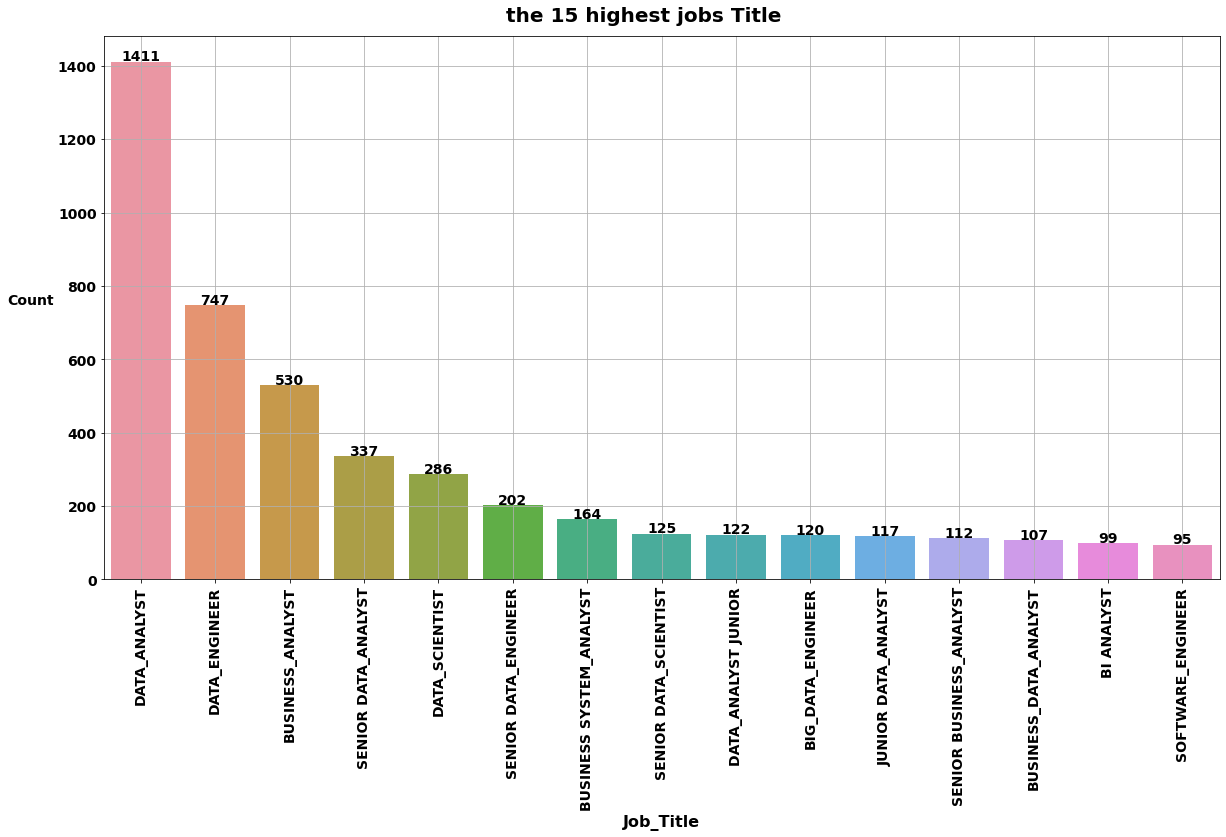

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Job Title'].value_counts().head(15).index, y=df['Job Title'].value_counts().head(15).values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Job_Title', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 15 highest jobs Title", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
             first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.grid()
plt.show()

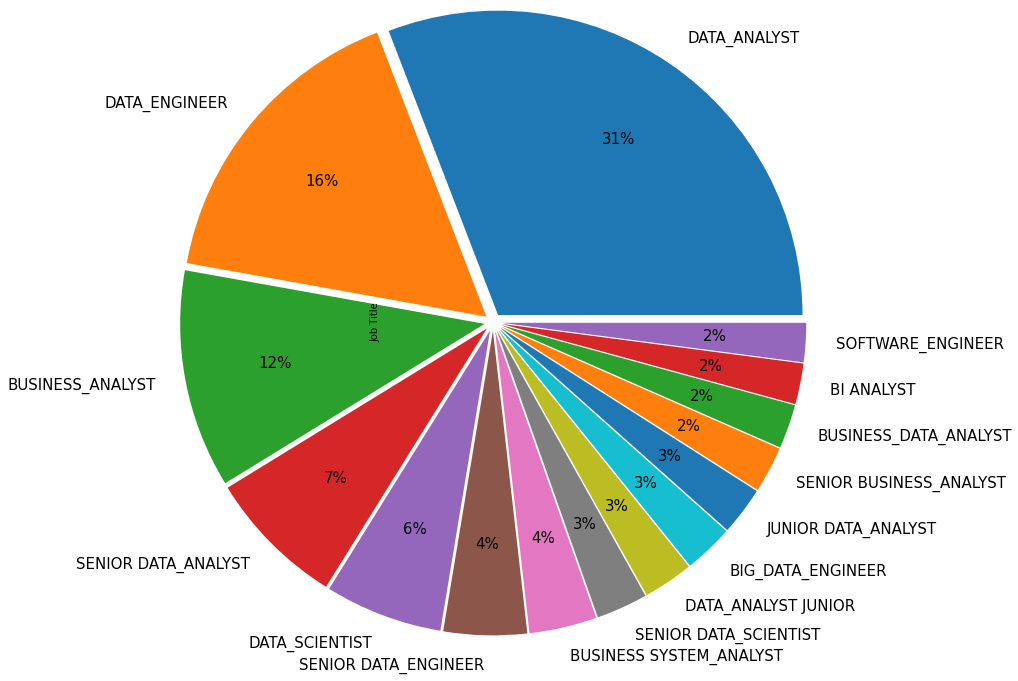

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Job Title'].value_counts()[:15].plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

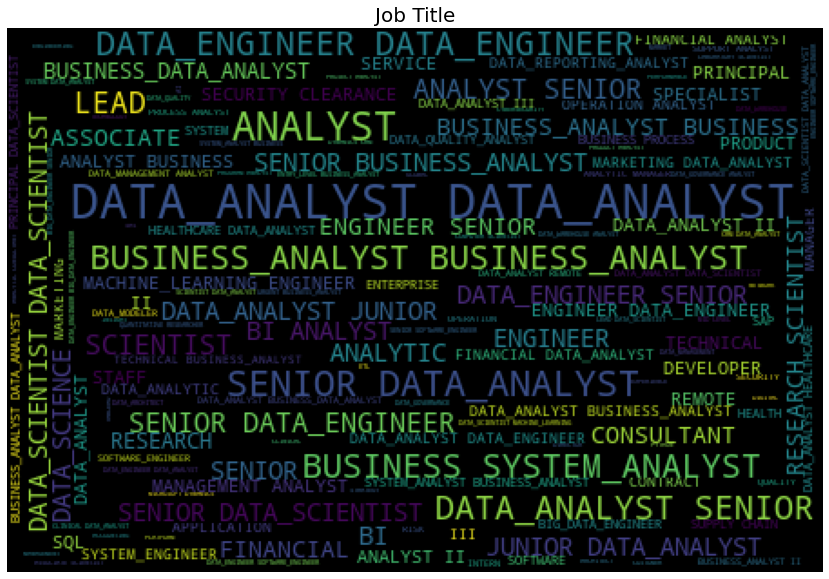

In [ ]:
#display for all the words in the job title column
job_title = df['Job Title']
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(job_title))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title(df['Job Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

####Salary Estimate column

In [ ]:
df['Salary Estimate'].value_counts()[:10]

$48K-$87K (Glassdoor est.)     95
$45K-$82K (Glassdoor est.)     92
$60K-$109K (Glassdoor est.)    92
$43K-$76K (Glassdoor est.)     91
$39K-$69K (Glassdoor est.)     91
$43K-$84K (Glassdoor est.)     84
$43K-$79K (Glassdoor est.)     83
$74K-$123K (Glassdoor est.)    78
$60K-$124K (Glassdoor est.)    69
$38K-$68K (Glassdoor est.)     69
Name: Salary Estimate, dtype: int64

> As we see, we have information about the salary `['Salary Estimate']`, But it is not in the numeric format, So we need to convert it to numeric data

> **get Numeric values from Salary Estimate**

In [ ]:
df['Salary Estimate'],_= df['Salary Estimate'].str.split('(',1).str

In [ ]:
df['Min Salary'],df['Max Salary']= df['Salary Estimate'].str.split('-').str
df['Max Salary'].replace({"$53 Per Hour": "$53K", "$26 Per Hour": "$26K"}, inplace=True)
df['Max Salary'].replace({"$27 Per Hour": "$27K"}, inplace=True)
df['Max Salary'].replace({"$75Per Hour": "$75K"}, inplace=True)

# Created values Max Salary and Min Salary as well as data cleaning with strip methods from string class
# Replace withe spaces for nan values through the numpy.
clean_salary = lambda x: x.replace('', np.nan).str.strip().str.lstrip('$').str.rstrip('K').astype(float)
df['Min Salary'] = clean_salary(df['Min Salary'])
df['Max Salary'] = clean_salary(df['Max Salary'])


In [ ]:
# Empty Field 'Salary Estimate' but created Max and Min salary.
df = df.drop(['Salary Estimate'],axis = 1)

> **Checking for missing values**

In [ ]:
df['Min Salary'].isnull().sum()

46

In [ ]:
df['Max Salary'].isnull().sum()

46

> As we see ,we have `46` missing values, and we don't want any row without salary estimate.

>Salary estimate is not as what we expected, it is not in the numeric form, we have $ sign and we have text and numbers in the form.

In [ ]:
df[df['Max Salary'].isnull()]

Job Title  \
10150          CONFIGURATION DATA_MANAGEMENT ANALYST III   
12680                                   SAP DATA_ANALYST   
12681                        DATA_SCIENTIST DATA_ANALYST   
12682                     MASTER DATA_MANAGEMENT ANALYST   
12767                                JUNIOR DATA_ANALYST   
12768                               CLIMATE DATA_ANALYST   
12769                                       DATA_ANALYST   
12770                            DATA_CONVERSION ANALYST   
12771                                DATA_ANALYST JUNIOR   
13408                       P C DATA_ANALYTIC ANALYST PR   
13409                          DATA_ANALYST DATA_LINEAGE   
13410     DATA_ANALYST CALIFORNIA ONLY CAMPUS RECRUITING   
13411  DATA_ANALYST ALL LOCATIONS NON CALIFORNIA CAMP...   
13412  CONTRACT DATA_BUSINESS_ANALYST DATA_GOVERNANCE...   
13413        SENIOR BUSINESS_DATA_ANALYST CA NY TX OR GA   
13414       BUSINESS SUPPORT DATA_ANALYSTS PHARMA COMMER   
13415                   CRIME DATA_ANALYST I MINNEAPOLIS   
13416                                SENIOR DATA_ANALYST   
13417                      SENIOR DATA_WAREHOUSE ANALYST   
13418                             GUIDEWIRE DATA_ANALYST   
13419  SENIOR GLOBAL DATA_ANALYST POWER BI DASHBOARD ...   
13420  NTD SECAUCUS AMERICA S TAX LAB DATA_GOVERNANCE...   
13421                     FLIGHT DATA_ANALYST SUPERVISOR   
13422  DATA_SCIENCE ANALYST STUDENT FALL II020 CANADI...   
13423                     ENTERPRISE DATA_ANALYST REMOTE   
13424                                SENIOR DATA_ANALYST   
13425                               PRODUCT ANALYST DATA   
13426                 SUPPLY CHAIN BUSINESS_DATA_ANALYST   
13427          BUSINESS_ANALYST SENIOR DATA_PROC SYS ANL   
13428  DATA_ARCHITECT OPERATING SYSTEM PROGRAMMER ANA...   
13429                            DATA_MANAGEMENT ANALYST   
13430                         SENIOR DATA_SYSTEM_ANALYST   
13431  DATA_QUALITY TECHNICAL SENIOR ANALYST 3M GLOBA...   
13432  DATA_QUALITY TECHNICAL SENIOR ANALYST 3M GSC P...   
13433                  PROGRAMMER ANALYST DATA_SCIENTIST   
13434  CONTENT ANALYST DATA_BA BUS TECH STRATEGY INVE...   
13435                 SERVICE PARTS ANALYST DATA_ANALYST   
13436                                SENIOR DATA_ANALYST   
13437      SENIOR BUSINESS_ANALYST DATA_CENTRE MIGRATION   
13468         SENIOR DATA_WAREHOUSE APPLICATIONS ANALYST   
13469                      SENIOR MARKETING DATA_ANALYST   
13470  SENIOR DATA_ANALYST HEALTH DATA_TERMINOLOGY VE...   
13471          TECHNICAL PROGRAM MANAGER DATA_ANALYSTICS   
13472   COORDINATED CAMPAIGN SENIOR ANALYST DATA_SCIENCE   
13580            PROGRAMMER ANALYST IV FOR DATA_ANALYTIC   
13581            PROGRAMMER ANALYST IV FOR DATA_ANALYTIC   

                                         Job Description  Rating  \
10150  Job Description\nPosition Title: Configuration...     4.4   
12680  Title SAP Data Analyst Location Wichita, KS Le...     5.0   
12681  WHO WE ARE: Net Pay Advance, Inc. is a financi...     5.0   
12682  Challengers Wanted.\nSee how we're embracing t...     NaN   
12767  Job Description\nJob description\nInterpret da...     5.0   
12768  Job Description\nClimate Data Analyst\n\nLexin...     3.8   
12769  Job Description\nJob description\n\n• Interpre...     5.0   
12770  About us\n\nBitwerx, Inc. is a team of industr...     NaN   
12771  Job Description\nJob description\nInterpret da...     5.0   
13408  P&C Data Analytics Analyst opening in Pennsylv...     NaN   
13409  Job Description:\n\nSKILLS AND EXPERIENCE REQU...     3.9   
13410  CAPGEMINI STAFF CONSULTANT ROLE\n\nWho are we?...     3.8   
13411  CAPGEMINI STAFF CONSULTANT ROLE\n\nWho are we?...     3.8   
13412  Contract Data Business Analyst Data Governance...     3.7   
13413  About Us:\n\nA Santa Monica-based tech company...     3.9   
13414  Role: Business Support Data Analysts with Phar...     3.9   
13415  Explore our passion for discovery\n\nGlobal co...     3.7   
13

> As we see from the previous display all the `NAN` Salary contain data analyst job title

>So I will use it to fill the null values

In [ ]:
mean_min_anlyt = round(df[df["Job Title"].str.contains('ANALY', na=False)]['Min Salary'].mean())
mean_max_anlyt = round(df[df["Job Title"].str.contains('ANALY', na=False)]['Max Salary'].mean())

print('Mean minimum salary of job title analytics {}'.format(mean_min_anlyt))
print('Mean maximum salary of job title analytics {}'.format(mean_max_anlyt))

Mean minimum salary of job title analytics 57
Mean maximum salary of job title analytics 97


In [ ]:
df['Min Salary'] = df['Min Salary'].fillna(mean_min_anlyt)

In [ ]:
df['Max Salary'] = df['Max Salary'].fillna(mean_max_anlyt)

In [ ]:
df[df['Max Salary'].isnull()]

Empty DataFrame
Columns: [Job Title, Job Description, Rating, Company Name, Location, Headquarters, Size, Founded, Type of ownership, Industry, Sector, Revenue, Competitors, Easy Apply, Min Salary, Max Salary]
Index: []

> In the end we have very good information about the salary we have `[min salary , max salary]` in separated columns and they are in numerical format and has no missing values

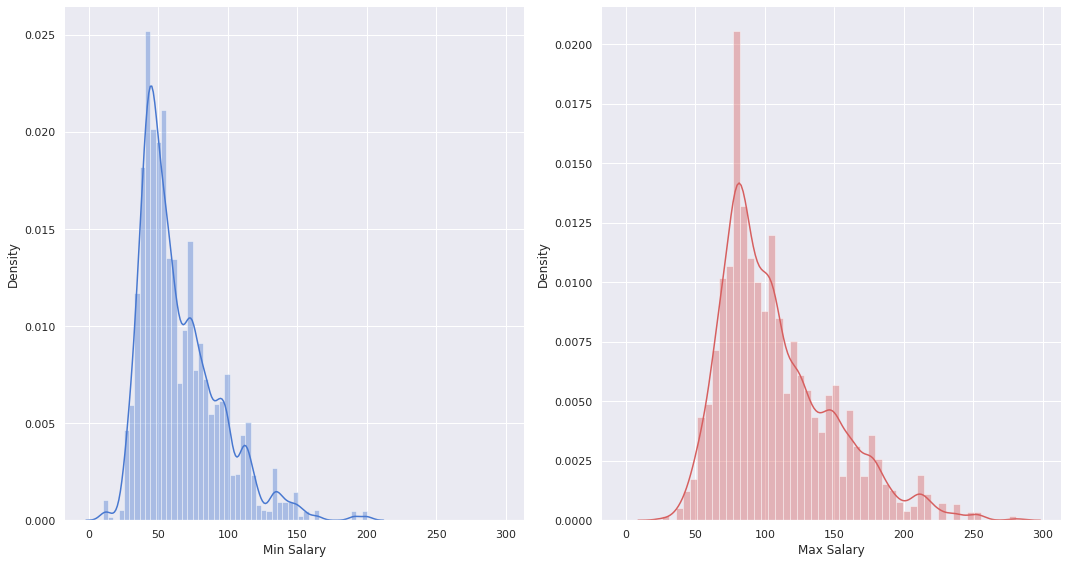

In [ ]:
sns.set(palette="muted", color_codes=True)
f, axs = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)
#Plot a histogram and kernel density estimate
sns.distplot(df['Min Salary'], color="b", ax=axs[0])
sns.distplot(df['Max Salary'], color="r",ax=axs[1])
# plt.setp(axs, yticks=[])
plt.tight_layout()

#####Handling Min Salary column

> show the outliers of a variable using an histogram with a boxplot

In [ ]:
fig = px.histogram(df, x="Min Salary", marginal="box")
fig.show()

#https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

> If we looking for this diagram we will find that
* min = 10
* q1 = 44
* median = 57
* q3 = 79
* upper = 129

> So I will remove values less than 10 and more than 129

In [ ]:
lower_limit_Min = 10
upper_limit_Min = 129

In [ ]:
df[df['Min Salary'] > upper_limit_Min]
df[df['Min Salary'] < lower_limit_Min]

df = df[df['Min Salary'] < upper_limit_Min]
df.shape

(15564, 16)

#####Handling Max Salary column

> show the outliers of a variable using an histogram with a boxplot

In [ ]:
fig = px.histogram(df, x="Max Salary", marginal="box")
fig.show()

#https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

> If we looking for this diagram we will find that
* min = 26
* q1 = 79
* median = 97
* q3 = 126
* upper = 194

> So I will remove values less than 26 and more than 194

In [ ]:
lower_limit_Max = 26
upper_limit_Max = 194

In [ ]:
df[df['Max Salary'] > upper_limit_Max]
df[df['Max Salary'] < lower_limit_Max]

df = df[df['Max Salary'] < upper_limit_Max]
df.shape

(15379, 16)

> See the distribution and outliers after handling the columns

In [ ]:
fig = px.histogram(df, x="Min Salary", marginal="box")
fig.show()

#https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

In [ ]:
fig = px.histogram(df, x="Max Salary", marginal="box")
fig.show()

In [ ]:
# count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

Total missing  % missing
Easy Apply                 14823  96.384680
Competitors                11322  73.619871
Founded                     4069  26.458157
Industry                    2189  14.233695
Sector                      2186  14.214188
Rating                      1529   9.942129
Headquarters                 927   6.027700
Size                         884   5.748098
Type of ownership            884   5.748098
Revenue                      884   5.748098
Company Name                   2   0.013005
Job Title                      0   0.000000
Job Description                0   0.000000
Location                       0   0.000000
Min Salary                     0   0.000000
Max Salary                     0   0.000000

####Job Description column

In [ ]:
#Checking for null values for 'Job Description'columns
df['Job Description'].isnull().sum()

0

> That's good, we can use job description variable for further analysis.

####Rating column

In [ ]:
#Checking for null values for 'Rating'columns
df['Rating'].isnull().sum()

1529

> As we see, We have `1529` missing value and we need to handle this column

> There is Something weird with the `company names` column, it includes number, which most probably reflects, their rating score.


In [ ]:
#make the Rating data type is float
df['Rating'] = df['Rating'].astype(float)

> I will replace all null values with the mean

In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
df['Rating'] = imputer.fit_transform(df['Rating'].values.reshape(-1,1))[:,0]

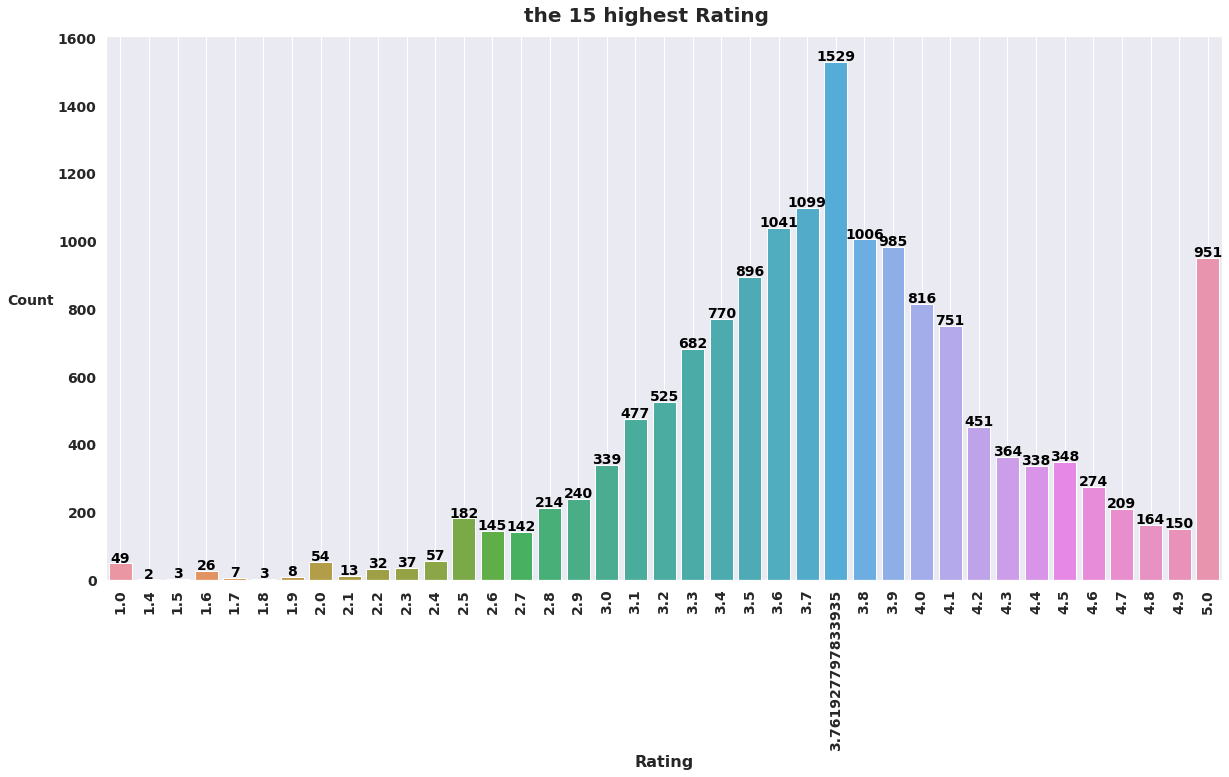

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Rating'].value_counts().index, y=df['Rating'].value_counts().values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 15 highest Rating", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
             first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.grid()
plt.show()

####Company Name column

In [ ]:
#Checking for null values for 'company name'columns
df['Company Name'].isnull().sum()

2

> As we see, We have `only 2` missing value and we need to handle this column

> There is Something weird with the `company names` column, it includes number, which most probably reflects, their rating score.

In [ ]:
df[['Company Name', 'Rating']].head(10)

Company Name    Rating
0                      Hopper\n3.5  3.500000
1                     Noom US\n4.5  4.500000
2                         Decode_M  3.761928
3            Sapphire Digital\n3.4  3.400000
4  United Entertainment Group\n3.4  3.400000
5               IFG Companies\n2.9  2.900000
6                PDT Partners\n4.4  4.400000
7           Enlightenment Research  3.761928
8                       Paige\n5.0  5.000000
9                 Jane Street\n4.8  4.800000

> As we see, that's the prove to my observation

> Now I will focus with `company name` column

 > **I will remove rating part from the company name.**

In [ ]:
df['Company Name'] = df['Company Name'].str.split('\n').str[0]
df['Company Name'],_= df['Company Name'].str.split(',',1).str
# removing '.' 
df['Company Name'] = df['Company Name'].str.replace(".", "") 
#remove any white space before and after any word and convert all strings to upper case
df['Company Name']= df['Company Name'].str.strip()
df['Company Name']= df['Company Name'].str.upper()
#checking for the values after handling
df[['Company Name', 'Rating']].head(10)

Company Name    Rating
0                      HOPPER  3.500000
1                     NOOM US  4.500000
2                    DECODE_M  3.761928
3            SAPPHIRE DIGITAL  3.400000
4  UNITED ENTERTAINMENT GROUP  3.400000
5               IFG COMPANIES  2.900000
6                PDT PARTNERS  4.400000
7      ENLIGHTENMENT RESEARCH  3.761928
8                       PAIGE  5.000000
9                 JANE STREET  4.800000

> Now we have clear values, And I will drop the two rows which has the null value

In [ ]:
df.dropna(axis = 'rows' ,subset=['Company Name'], inplace=True)

In [ ]:
df['Company Name'].value_counts()[:15]

STAFFIGO TECHNICAL SERVICES    430
DIVERSE LYNX                   104
KFORCE                          98
AMAZON                          87
IBM                             79
CITI                            71
APPLE                           70
ROBERT HALF                     67
LORVEN TECHNOLOGIES INC         61
SOLEKAI SYSTEMS CORP            59
AVACEND                         58
MONDO                           57
APEX SYSTEMS                    56
MUFG                            53
RANDSTAD                        52
Name: Company Name, dtype: int64

In [ ]:
len(df['Company Name'].unique())

5810

**Some virtualization for the `Company Name` column**

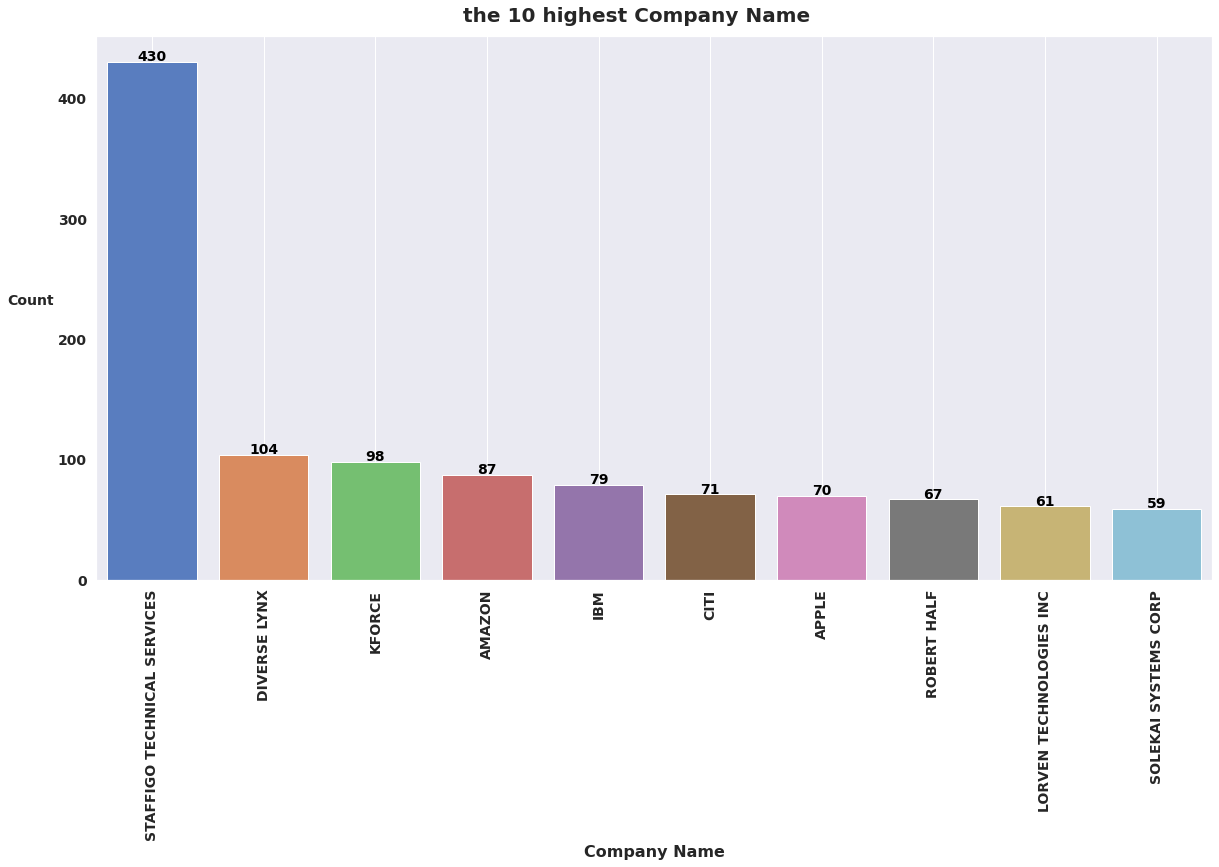

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Company Name'].value_counts().head(10).index, y=df['Company Name'].value_counts().head(10).values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Company Name', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 10 highest Company Name", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
  first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),textcoords='offset points')
plt.grid()
plt.show()

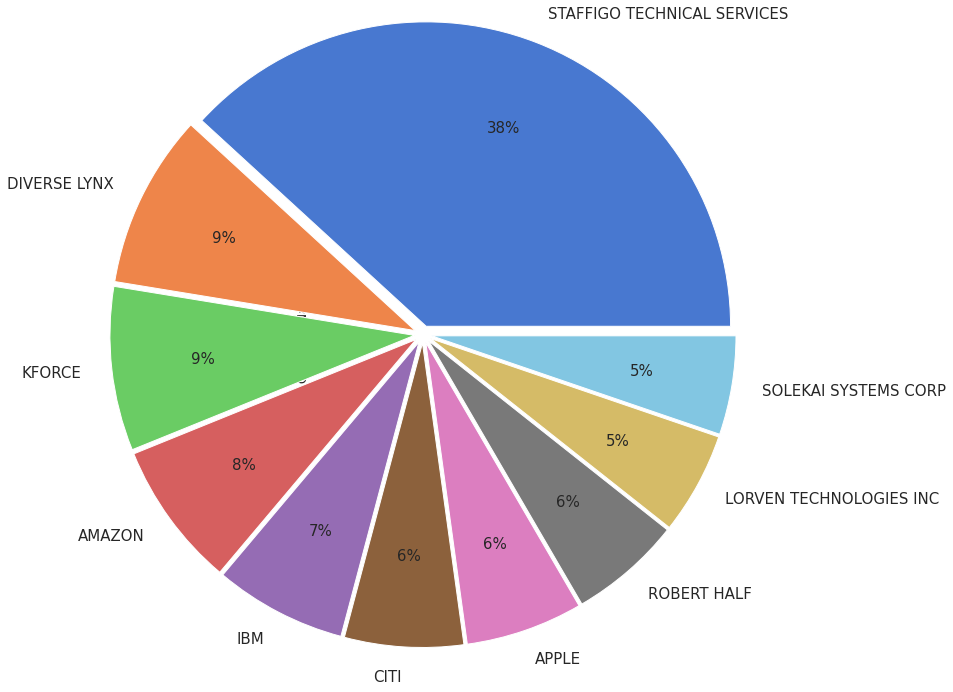

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Company Name'].value_counts()[:10].plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

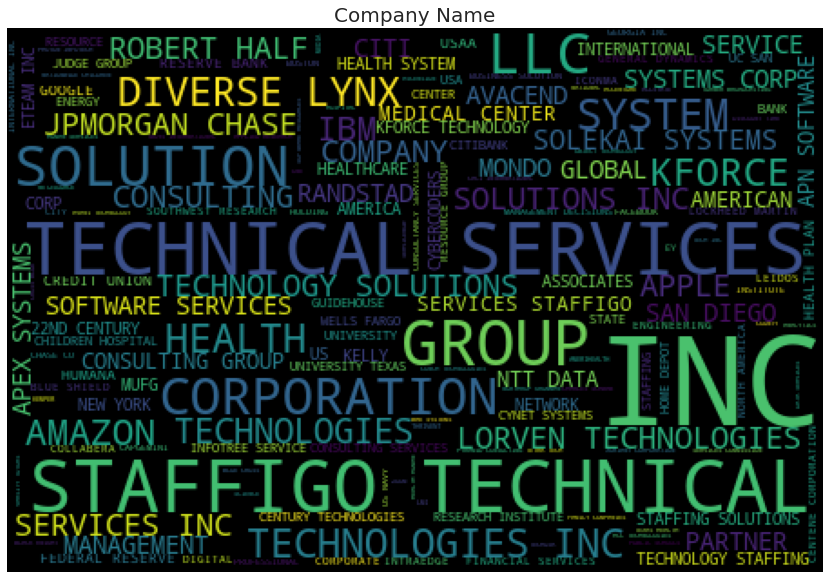

In [ ]:
#display for all the words in the Company Name column
Company_Name = df['Company Name']
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Company_Name))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title(df['Company Name'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [ ]:
# count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

Total missing  % missing
Easy Apply                 14821  96.384210
Competitors                11320  73.616440
Founded                     4067  26.448592
Industry                    2187  14.222540
Sector                      2184  14.203031
Headquarters                 925   6.015478
Size                         882   5.735839
Type of ownership            882   5.735839
Revenue                      882   5.735839
Job Title                      0   0.000000
Job Description                0   0.000000
Rating                         0   0.000000
Company Name                   0   0.000000
Location                       0   0.000000
Min Salary                     0   0.000000
Max Salary                     0   0.000000

In [ ]:
#check every value to find the nearest values for it to convert to the base one
matches = fuzzywuzzy.process.extract("BMW", df['Company Name'].unique(), limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('IBM', 67),
 ('BMO', 67),
 ('BRMI', 57),
 ('BIDMC', 50),
 ('BOMBAS', 44),
 ('VMWARE', 44),
 ('COBHAM', 44),
 ('BAMBEE', 44),
 ('BD', 40),
 ('MITIWEB', 40),
 ('3M', 40),
 ('BOWHEAD', 40),
 ('BILLCOM', 40),
 ('ABIOMED', 40),
 ('BLUWAVE', 40),
 ('BITWERX', 40),
 ('MCGAWIO', 40),
 ('BLUEBEAM', 36),
 ('M&T BANK', 36),
 ('SIGMAWAY', 36),
 ('HOMEWISE', 36),
 ('CEREBRUM', 36),
 ('TWO SIGMA', 33),
 ('BLOOMBERG', 33),
 ('B12', 33),
 ('BETTERCOM', 33),
 ('BEY', 33),
 ('BCFORWARD', 33),
 ('LMI', 33),
 ('HMS', 33)]

> I was checking if there is any company was repeated in another form (with any change in some words or there is any special character)but didn't exist which is good

####Location column

In [ ]:
#Checking for null values for 'Rating'columns
df['Location'].isnull().sum()

0

> As we see, We haven't any missing values in this column, which it's very good


In [ ]:
df['Location'].head(10)

0     New York, NY
1     New York, NY
2     New York, NY
3    Lyndhurst, NJ
4     New York, NY
5     New York, NY
6     New York, NY
7     New York, NY
8     New York, NY
9     New York, NY
Name: Location, dtype: object

> The `Location` column is being split.

In [ ]:
# Separate 'City' & 'State' from job 'Location'
df[['City','State']] = df['Location'].str.split(', ',expand=True).drop([2],axis=1)

In [ ]:
df['State'].isna().sum()

218

In [ ]:
df[df['State'].isnull()]

Job Title  \
13229                                    BI DATA_ANALYST   
13230                  BUSINESS PERFORMANCE DATA_ANALYST   
13231                             MARKETING DATA_ANALYST   
13232                              BUSINESS_DATA_ANALYST   
13233                       DATA_QUALITY CONTROL ANALYST   
...                                                  ...   
13468         SENIOR DATA_WAREHOUSE APPLICATIONS ANALYST   
13469                      SENIOR MARKETING DATA_ANALYST   
13470  SENIOR DATA_ANALYST HEALTH DATA_TERMINOLOGY VE...   
13471          TECHNICAL PROGRAM MANAGER DATA_ANALYSTICS   
13472   COORDINATED CAMPAIGN SENIOR ANALYST DATA_SCIENCE   

                                         Job Description    Rating  \
13229  What You'll Do:\n\n\nAs the Business Intellige...  3.900000   
13230  Listening to Albertans. Going deeper to unders...  3.700000   
13231  Overview\n\n\nAs a key member of the Analytics...  3.500000   
13232  What We Are Looking For\n\nNEP is currently se...  4.600000   
13233  Join our team dedicated to developing and exec...  4.500000   
...                                                  ...       ...   
13468  Experienced in all aspects of Data Warehousing...  3.100000   
13469  McGaw.io, a kick-ass marketing technology and ...  3.761928   
13470  What You'll Do\n\nAs a Healthcare Data Termino...  3.300000   
13471  A\n\nre you ready to take your career to the n...  2.500000   
13472  The DNC Coordinated Campaign is seeking a Seni...  3.700000   

                                  Company Name       Location  \
13229                                BILLTRUST         Remote   
13230                            ATB FINANCIAL         Canada   
13231                               EFINANCIAL  United States   
13232              NATIONAL EDUCATION PARTNERS         Remote   
13233                                  NOVETTA         Remote   
...                                        ...            ...   
13468  AGEATIA TECHNOLOGY CONSULTANCY SERVICES       Illinois   
13469                                  MCGAWIO         Remote   
13470                        CROSSIX SOLUTIONS         Remote   
13471                              SERVICELINK         Remote   
13472                     THE DEMOCRATIC PARTY         Remote   

            Headquarters                     Size  Founded  \
13229  Lawrenceville, NJ    501 to 1000 employees   2001.0   
13230   Edmonton, Canada  5001 to 10000 employees   1938.0   
13231       Bellevue, WA     201 to 500 employees   2001.0   
13232     Scottsdale, AZ     201 to 500 employees   2019.0   
13233        Mc Lean, VA    501 to 1000 employees   2012.0   
...                  ...                      ...      ...   
13468     Schaumburg, IL      51 to 200 employees   2002.0   
13469                NaN                      NaN      NaN   
13470       New York, NY     201 to 500 employees   2005.0   
13471     Pittsburgh, PA   1001 to 5000 employees   1967.0   
13472    Tallahassee, FL        1 to 50 employees      NaN   

                    Type of ownership  \
13229               Company - Private   
13230               Company - Private   
13231               Company - Private   
13232               Company - Private   
13233               Company - Private   
...                               ...   
13468               Company - Private   
13469                             NaN   
13470                Company - Public   
13471  Subsidiary or Business Segment   
13472              Other Organization   

                                      Industry                  Sector  \
13229  Enterprise Software & Network Solutions  Information Technology   
13230    Investment Banking & Asset Management                 Finance   
13231          Insurance Agencies & Brokerages               Insurance   
13232                  Colleges & Universities               Education   
13233  Enterprise Software & Network Solutions  Information Technology   
...                   

As we see we have `218` rows have none value in `State` Column so I will change this to be look like the corresponding `City` column value to avoid any null values

In [ ]:
df['State'].fillna(df['City'], inplace=True)

In [ ]:
print(len(df['State'].value_counts()), '\n')
df['State'].value_counts()

70 



TX              4086
CA              3090
NY              1146
IL              1070
AZ               966
                ... 
Los Angeles        1
Canada             1
Fulton             1
Anne Arundel       1
Mercer             1
Name: State, Length: 70, dtype: int64

> Since I'll only be using the states, I'll replace 
* `United States` with `US`
* `NEW YORK STAT` with `NY`
* `GEORGIA` with `GA`
* `MICHIGAN` with `MI`
* `MINNESOTA` with `MN`
* `MARYLAND` with `MD`
* `FLORIDA` with `FL`
* `MASSACHUSETTS` with `MA`
* `OKLAHOMA` with `OK`
* `ARIZONA` with `AZ`
* `UTAH` with `UT`
* `COLORADO` with `CO`
* `CANADA` with `CA`
* `New Jersey` with `NJ`
* `Arapahoe` with `CO`
* `Ontario` with `ON`
* `Cuyahoga` with `OH`
* `Illinois` with `IL`
* `California` with `CA`
* `Los Angeles` with `CA`
* `United Kingdom` has city name is `Stevenage`, So I will replace it with with `SG`
* `Fulton` with `GA`
* `Texas` with `TX`
* `Virginia` with `VA`
* `Pennsylvania` with `PA`
* `Connecticut` with `CT`
* `North Carolina` with `NC`
* `SOUTH CAROLINA` with `SC`
* `Anne Arundel` is a city in this state `Maryland` so i will replace it  with `MD`
* `Mercer` is a city in `New Jersey` so I will replace with `NJ`

[Source](https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm)

> i will remove the row which has state  = `Multiple Locations`

In [ ]:
#replace the states values with the cut of them 
df['State'] = df['State'].replace(['United States', 'New York State', 'Georgia', 'Michigan', 'Minnesota', 'Maryland', 'Florida', 'Massachusetts', 'Oklahoma', 'Arizona', 'Utah', 'Colorado', 'Canada', 'New Jersey', 'Arapahoe', 'Ontario', 'Cuyahoga', 'Illinois', 'California', 'Los Angeles', 'United Kingdom', 'Fulton', 'Texas', 'Virginia', 'Pennsylvania', 'Connecticut', 'North Carolina', 'South Carolina', 'Anne Arundel', 'Mercer'],
                                  ['US', 'NY', 'GA', 'MI', 'MN', 'MD', 'FL', 'MA', 'OK', 'AZ', 'UT', 'CO', 'CA', 'NJ', 'CO', 'ON', 'OH', 'IL', 'CA', 'CA', 'SG', 'GA', 'TX', 'VA', 'PA', 'CT', 'NC', 'SC', 'MD', 'NJ'] ,regex=True)

In [ ]:
#drop rows which has 'Multiple Locations' as a 'State' value
df = df[df['State']!='Multiple Locations']

In [ ]:
df['State']= df['State'].str.strip()
df['State']= df['State'].str.upper()

In [ ]:
print(len(df['State'].value_counts()), '\n')
df['State'].value_counts()

43 



TX        4089
CA        3096
NY        1148
IL        1074
AZ         967
PA         928
FL         838
NJ         370
OH         296
VA         263
NC         238
MA         227
MD         198
DC         196
GA         170
CO         151
WA         144
MO         121
MN          90
US          85
WI          80
DE          71
TN          71
MI          69
IN          61
REMOTE      51
OR          45
KS          44
UT          34
NE          33
OK          32
KY          31
NV          16
HI          12
NM           9
LA           7
ON           5
SC           4
AK           4
SG           3
CT           3
VT           1
MS           1
Name: State, dtype: int64

**Some virtualization for the `State` column**

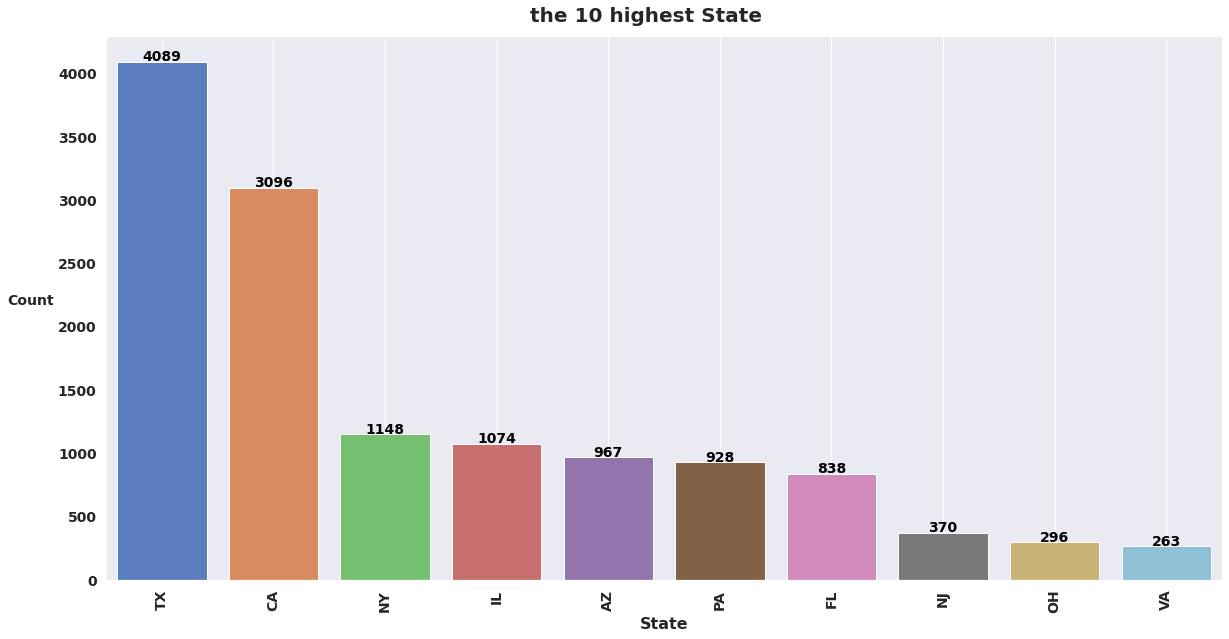

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['State'].value_counts().head(10).index, y=df['State'].value_counts().head(10).values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('State', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 10 highest State", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
  first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),textcoords='offset points')
plt.grid()
plt.show()

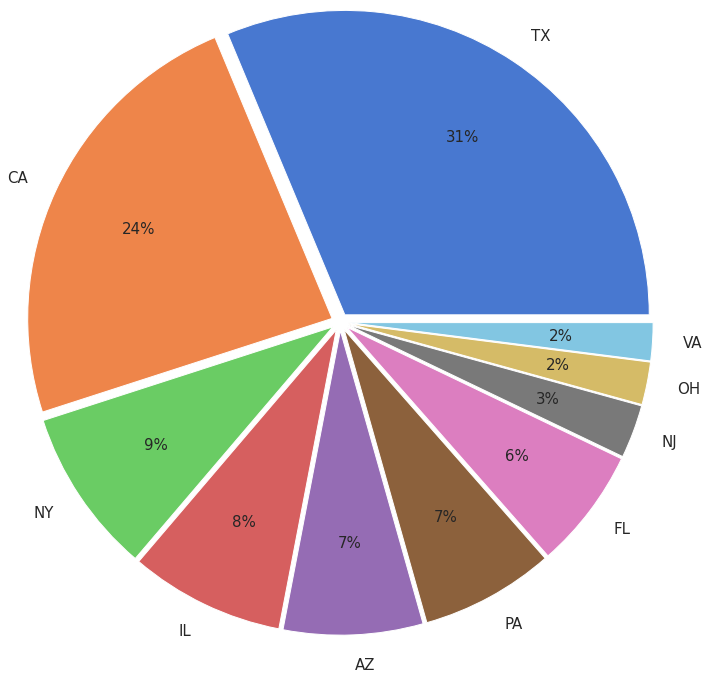

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['State'].value_counts()[:10].plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

> I will focus only with `City` and `State` columns so I will drop `Location` column

In [ ]:
df.drop(['Location'], axis = 1, inplace = True) 

In [ ]:
df.head(5)

Job Title  \
0            SENIOR DATA_SCIENTIST   
1  DATA_SCIENTIST PRODUCT ANALYTIC   
2             DATA_SCIENCE MANAGER   
3                     DATA_ANALYST   
4            DIRECTOR DATA_SCIENCE   

                                     Job Description    Rating  \
0  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...  3.500000   
1  At Noom, we use scientifically proven methods ...  4.500000   
2  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...  3.761928   
3  Sapphire Digital seeks a dynamic and driven mi...  3.400000   
4  Director, Data Science - (200537)\nDescription...  3.400000   

                 Company Name      Headquarters                    Size  \
0                      HOPPER  Montreal, Canada   501 to 1000 employees   
1                     NOOM US      New York, NY  1001 to 5000 employees   
2                    DECODE_M      New York, NY       1 to 50 employees   
3            SAPPHIRE DIGITAL     Lyndhurst, NJ    201 to 500 employees   
4  UNITED ENTERTAINMENT GROUP      New York, NY     51 to 200 employees   

   Founded  Type of ownership                   Industry  \
0   2007.0  Company - Private            Travel Agencies   
1   2008.0  Company - Private  Health, Beauty, & Fitness   
2      NaN            Unknown                        NaN   
3   2019.0  Company - Private                   Internet   
4   2007.0  Company - Private    Advertising & Marketing   

                   Sector                   Revenue               Competitors  \
0        Travel & Tourism  Unknown / Non-Applicable                       NaN   
1       Consumer Services  Unknown / Non-Applicable                       NaN   
2                     NaN  Unknown / Non-Applicable                       NaN   
3  Information Technology  Unknown / Non-Applicable      Zocdoc, Healthgrades   
4       Business Services  Unknown / Non-Applicable  BBDO, Grey Group, Droga5   

  Easy Apply  Min Salary  Max Salary       City State  
0        NaN       111.0       181.0   New York    NY  
1        NaN       111.0       181.0   New York    NY  
2       TRUE       111.0       181.0   New York    NY  
3        NaN       111.0       181.0  Lyndhurst    NJ  
4        NaN       111.0       181.0   New York    NY

####Headquarters column

In [ ]:
#Checking for null values for 'Rating'columns
df['Headquarters'].isnull().sum()

925

> As we see, We have `925` missing values in this column, so we need to handle this problem

In [ ]:
df['Headquarters'].head(10)

0    Montreal, Canada
1        New York, NY
2        New York, NY
3       Lyndhurst, NJ
4        New York, NY
5        Hartford, CT
6        New York, NY
7        New York, NY
8        New York, NY
9        New York, NY
Name: Headquarters, dtype: object

> If we see that we have Headquarters column looks like Location column so we can make the same thing in this column

> The `Headquarters` column is being split.

In [ ]:
# Separate 'City' & 'State' from job 'Headquarters'
df['HQCity'],df['HQState'] = df['Headquarters'].str.split(', ',1).str

In [ ]:
print(len(df['HQState'].value_counts()), '\n')
df['HQState'].value_counts()[:50]

104 



CA                2787
TX                1541
NY                1294
IL                1215
NJ                 877
VA                 842
FL                 510
PA                 509
GA                 402
MA                 351
AZ                 298
MD                 289
MI                 285
OH                 244
WA                 231
United Kingdom     231
DC                 201
India              189
MO                 174
NC                 166
MN                 118
TN                 106
Japan              106
Canada              97
CO                  94
WI                  92
CT                  90
France              69
KY                  57
Germany             56
KS                  49
IN                  49
SC                  44
Switzerland         42
Singapore           42
Netherlands         39
OK                  35
IA                  34
RI                  32
AL                  29
Ireland             29
AK                  27
NE                  27
UT         

In [ ]:
df[df['HQState'].isnull()]

Job Title  \
55             DATA_SCIENTIST ANALYTIC INFERENCE   
61                DATA_SCIENTIST PEOPLE ANALYTIC   
63                                DATA_SCIENTIST   
82                                DATA_SCIENTIST   
89                 DATA_SCIENTIST DATA_ARCHITECT   
...                                          ...   
16046              DATA_ENGINEER BIG_DATA_HADOOP   
16047           DEVELOPER DATA_ENGINEER BIG_DATA   
16051                      DATA_NETWORK ENGINEER   
16059               DATA_INTEGRATION ENGINEER II   
16079  DATA_ENGINEER IRVING TX 6 MONTHS CONTRACT   

                                         Job Description    Rating  \
55     Hello, World! Codecademy has helped over 45 mi...  3.761928   
61     Doctors Without Borders/Médecins Sans Frontièr...  3.761928   
63                                                #NAME?  3.761928   
82     A retail energy provider in New York is lookin...  3.761928   
89     Job Description\nSr. Big Data Architect:\n\n# ...  3.761928   
...                                                  ...       ...   
16046  Analyze and understand data sources & APIs• De...  3.761928   
16047  OTSI is searching for a Developer, Data Engine...  3.761928   
16051  This position will be responsible for the miss...  3.761928   
16059  Job Description\nThe Data Integration Engineer...  3.761928   
16079  Data Platform Engineer\no Apache Pinot and Apa...  3.761928   

                                            Company Name Headquarters Size  \
55                                           CODEACADEMY          NaN  NaN   
61     DOCTORS WITHOUT BORDERS | MÉDECINS SANS FRONTI...          NaN  NaN   
63                                PIERCE TECHNOLOGY CORP          NaN  NaN   
82                   HUXLEY BANKING & FINANCIAL SERVICES          NaN  NaN   
89                            FINANCIAL SERVICES COMPANY          NaN  NaN   
...                                                  ...          ...  ...   
16046                        OBJECT TECHNOLOGY SOLUTIONS          NaN  NaN   
16047                        OBJECT TECHNOLOGY SOLUTIONS          NaN  NaN   
16051                      BRIGHTSTAR MEDIA ORGANIZATION          NaN  NaN   
16059                                 OUTSOURCED CIO LLC          NaN  NaN   
16079                                  SUNCAP TECHNOLOGY          NaN  NaN   

       Founded Type of ownership Industry Sector Revenue Competitors  \
55         NaN               NaN      NaN    NaN     NaN         NaN   
61         NaN               NaN      NaN    NaN     NaN         NaN   
63         NaN               NaN      NaN    NaN     NaN         NaN   
82         NaN               NaN      NaN    NaN     NaN         NaN   
89         NaN               NaN      NaN    NaN     NaN         NaN   
...        ...               ...      ...    ...     ...         ...   
16046      NaN               NaN      NaN    NaN     NaN         NaN   
16047      NaN               NaN      NaN    NaN     NaN         NaN   
16051      NaN               NaN      NaN    NaN     NaN         NaN   
16059      NaN               NaN      NaN    NaN     NaN         NaN   
16079      NaN               NaN      NaN    NaN     NaN         NaN   

      Easy Apply  Min Salary  Max Salary           City State HQCity HQState  
55           NaN       120.0       140.0       New York    NY    NaN     NaN  
61           NaN       119.0       147.0       New York    NY    NaN     NaN  
63           NaN       119.0       147.0       New York    NY    NaN     NaN  
82           NaN        74.0       124.0       New York    NY    NaN     NaN  
89           NaN        74.0       124.0       New York    NY    NaN     NaN  
...          ...         ...         ...            ...   ...    ...     ...  
16046        NaN        30.0        60.0         Irving    TX    NaN     NaN  
16047        NaN        30.0        60.0         Irving    TX    NaN     NaN  
16051        NaN        30.0        60.0  Grand Prairie    T

> As we see, we have `925` missing value so i will use the `State` Column to fill the null values in `HQState` column

In [ ]:
#fill null values by using State column
df['HQState'].fillna(df['State'], inplace=True)

In [ ]:
df['HQState'].isnull().sum()

0

In [ ]:
df[df['HQCity'].isnull()]

Job Title  \
55             DATA_SCIENTIST ANALYTIC INFERENCE   
61                DATA_SCIENTIST PEOPLE ANALYTIC   
63                                DATA_SCIENTIST   
82                                DATA_SCIENTIST   
89                 DATA_SCIENTIST DATA_ARCHITECT   
...                                          ...   
16046              DATA_ENGINEER BIG_DATA_HADOOP   
16047           DEVELOPER DATA_ENGINEER BIG_DATA   
16051                      DATA_NETWORK ENGINEER   
16059               DATA_INTEGRATION ENGINEER II   
16079  DATA_ENGINEER IRVING TX 6 MONTHS CONTRACT   

                                         Job Description    Rating  \
55     Hello, World! Codecademy has helped over 45 mi...  3.761928   
61     Doctors Without Borders/Médecins Sans Frontièr...  3.761928   
63                                                #NAME?  3.761928   
82     A retail energy provider in New York is lookin...  3.761928   
89     Job Description\nSr. Big Data Architect:\n\n# ...  3.761928   
...                                                  ...       ...   
16046  Analyze and understand data sources & APIs• De...  3.761928   
16047  OTSI is searching for a Developer, Data Engine...  3.761928   
16051  This position will be responsible for the miss...  3.761928   
16059  Job Description\nThe Data Integration Engineer...  3.761928   
16079  Data Platform Engineer\no Apache Pinot and Apa...  3.761928   

                                            Company Name Headquarters Size  \
55                                           CODEACADEMY          NaN  NaN   
61     DOCTORS WITHOUT BORDERS | MÉDECINS SANS FRONTI...          NaN  NaN   
63                                PIERCE TECHNOLOGY CORP          NaN  NaN   
82                   HUXLEY BANKING & FINANCIAL SERVICES          NaN  NaN   
89                            FINANCIAL SERVICES COMPANY          NaN  NaN   
...                                                  ...          ...  ...   
16046                        OBJECT TECHNOLOGY SOLUTIONS          NaN  NaN   
16047                        OBJECT TECHNOLOGY SOLUTIONS          NaN  NaN   
16051                      BRIGHTSTAR MEDIA ORGANIZATION          NaN  NaN   
16059                                 OUTSOURCED CIO LLC          NaN  NaN   
16079                                  SUNCAP TECHNOLOGY          NaN  NaN   

       Founded Type of ownership Industry Sector Revenue Competitors  \
55         NaN               NaN      NaN    NaN     NaN         NaN   
61         NaN               NaN      NaN    NaN     NaN         NaN   
63         NaN               NaN      NaN    NaN     NaN         NaN   
82         NaN               NaN      NaN    NaN     NaN         NaN   
89         NaN               NaN      NaN    NaN     NaN         NaN   
...        ...               ...      ...    ...     ...         ...   
16046      NaN               NaN      NaN    NaN     NaN         NaN   
16047      NaN               NaN      NaN    NaN     NaN         NaN   
16051      NaN               NaN      NaN    NaN     NaN         NaN   
16059      NaN               NaN      NaN    NaN     NaN         NaN   
16079      NaN               NaN      NaN    NaN     NaN         NaN   

      Easy Apply  Min Salary  Max Salary           City State HQCity HQState  
55           NaN       120.0       140.0       New York    NY    NaN      NY  
61           NaN       119.0       147.0       New York    NY    NaN      NY  
63           NaN       119.0       147.0       New York    NY    NaN      NY  
82           NaN        74.0       124.0       New York    NY    NaN      NY  
89           NaN        74.0       124.0       New York    NY    NaN      NY  
...          ...         ...         ...            ...   ...    ...     ...  
16046        NaN        30.0        60.0         Irving    TX    NaN      TX  
16047        NaN        30.0        60.0         Irving    TX    NaN      TX  
16051        NaN        30.0        60.0  Grand Prairie    T

> As we see, we have `925` missing value so i will use the `City` Column to fill the null values in `HQCity` column

In [ ]:
#fill null values by using City column
df['HQCity'].fillna(df['City'], inplace=True)

In [ ]:
df['HQCity'].isnull().sum()

0

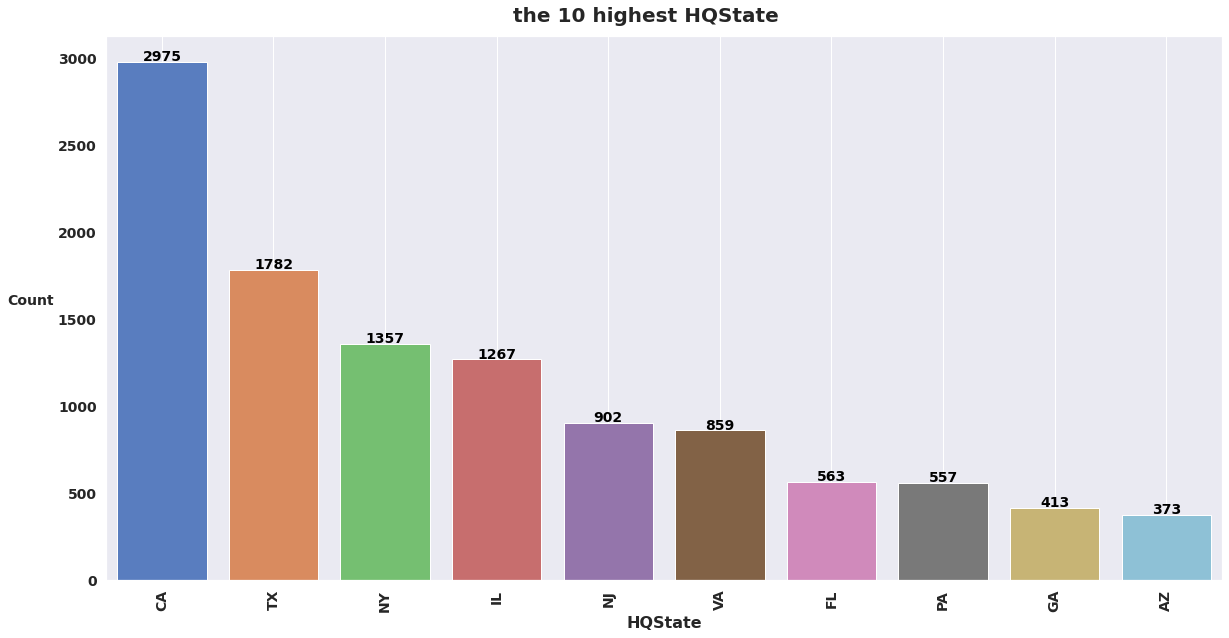

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['HQState'].value_counts().head(10).index, y=df['HQState'].value_counts().head(10).values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('HQState', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 10 highest HQState", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
  first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),textcoords='offset points')
plt.grid()
plt.show()

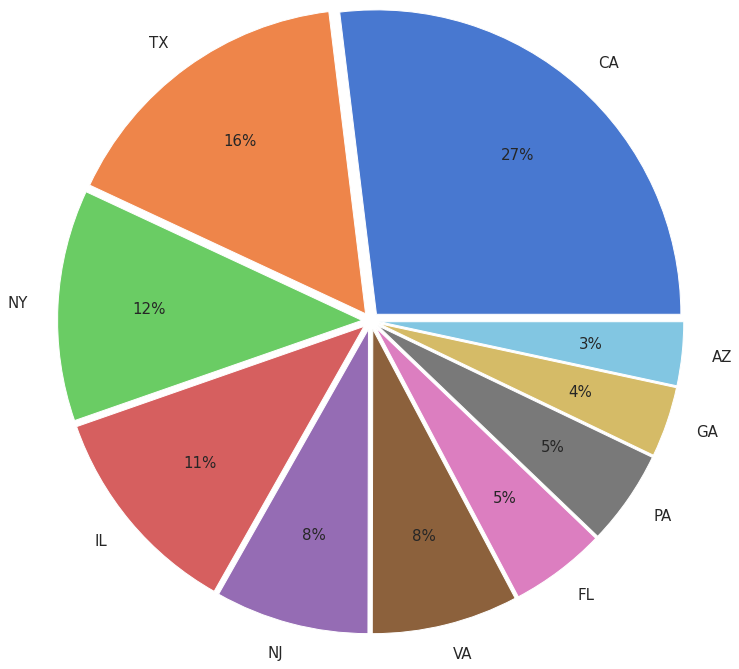

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['HQState'].value_counts()[:10].plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

> I will focus only with `HQCity` and `HQState` columns so I will drop `Headquarters` column

In [ ]:
#drop headquarter column
df.drop(['Headquarters'], axis = 1, inplace = True) 

####Size column

In [ ]:
#Checking for null values for 'Rating'columns
df['Size'].isnull().sum()

882

> As we see, We have `882` missing value and we need to handle this column

In [ ]:
#see the distribution of values
df['Size'].value_counts()

10000+ employees           3214
51 to 200 employees        2760
1001 to 5000 employees     2446
1 to 50 employees          2074
201 to 500 employees       1565
501 to 1000 employees      1266
5001 to 10000 employees     852
Unknown                     317
Name: Size, dtype: int64

> As we see,  we have values equal `Unknown`
* so I will replace all the `unknown` values to `null` to handl this column
* i will split this column to `max` and `min` values

In [ ]:
#replace all unknown values with nan value
df['Size'].replace('Unknown', np.nan, inplace = True)
df['Size'].value_counts()

10000+ employees           3214
51 to 200 employees        2760
1001 to 5000 employees     2446
1 to 50 employees          2074
201 to 500 employees       1565
501 to 1000 employees      1266
5001 to 10000 employees     852
Name: Size, dtype: int64

> Created values Max Size and Min Size as well as data cleaning with strip methods from string class

> Replace withe spaces for nan values through the numpy.

> remove the + char from the numbers

In [ ]:
#remove employee word from all values
df['Size'],_= df['Size'].str.split('e',1).str

In [ ]:
df['Size'].value_counts()

10000+            3214
51 to 200         2760
1001 to 5000      2446
1 to 50           2074
201 to 500        1565
501 to 1000       1266
5001 to 10000      852
Name: Size, dtype: int64

In [ ]:
#split the Size int min and max size 
df['Min Size'],df['Max Size']= df['Size'].str.split('to').str

In [ ]:
clean_salary = lambda x: x.replace('', np.nan).str.strip().str.rstrip('+').astype(str)
df['Min Size'] = clean_salary(df['Min Size'])
df['Max Size'] = clean_salary(df['Max Size'])

In [ ]:
#Change the type of the new two colun to float because this two has base more than 10
df['Min Size'] = df['Min Size'].astype(float)
df['Max Size'] = df['Max Size'].astype(float)

In [ ]:
#display the distrubution of values
df['Min Size'].value_counts()

10000.0    3214
51.0       2760
1001.0     2446
1.0        2074
201.0      1565
501.0      1266
5001.0      852
Name: Min Size, dtype: int64

In [ ]:
#display the distrubution of values
df['Max Size'].value_counts()

200.0      2760
5000.0     2446
50.0       2074
500.0      1565
1000.0     1266
10000.0     852
Name: Max Size, dtype: int64

#####Handling the missing values

In [ ]:
#checking for null
df['Max Size'].isnull().sum()

4413

In [ ]:
#checking for Null
df['Min Size'].isnull().sum()

1199

In [ ]:
#fill the null values with the mean
df['Min Size'].fillna(df['Min Size'].mean(), inplace = True)

In [ ]:
df['Min Size'] = df['Min Size'].round()

In [ ]:
#checking for Null
df['Min Size'].isnull().sum()

0

In [ ]:
#display the distrubution of values
df['Min Size'].value_counts()

10000.0    3214
51.0       2760
1001.0     2446
1.0        2074
201.0      1565
501.0      1266
2817.0     1199
5001.0      852
Name: Min Size, dtype: int64

> As we Know there is a relation between `Max Size` and `Min Size` so I will use this two column to fill the null values of `Max Size` column

In [ ]:
imputer = IterativeImputer(max_iter=20, random_state=42)
df['Max Size'] = imputer.fit_transform(df[['Max Size', 'Min Size']])

In [ ]:
df['Max Size'] = df['Max Size'].round()

In [ ]:
#display the distrubution of values
df['Max Size'].value_counts()

21609.0    3214
200.0      2760
5000.0     2446
50.0       2074
500.0      1565
1000.0     1266
6553.0     1199
10000.0     852
Name: Max Size, dtype: int64

In [ ]:
# I will drop the size column because I have min and max size
df = df.drop(['Size'],axis = 1)

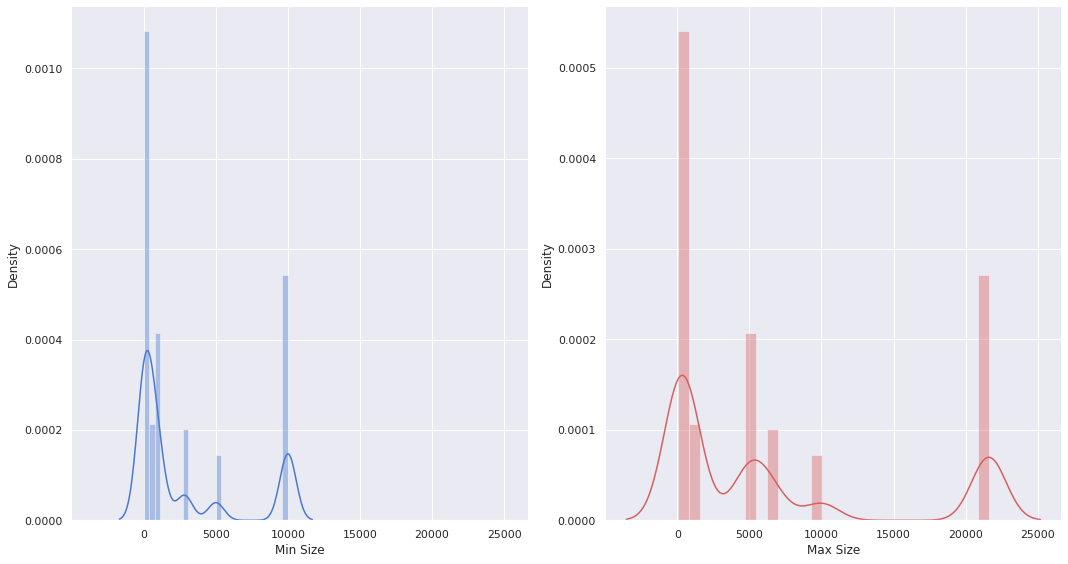

In [ ]:
sns.set(palette="muted", color_codes=True)
f, axs = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)
#Plot a histogram and kernel density estimate
sns.distplot(df['Min Size'], color="b", ax=axs[0])
sns.distplot(df['Max Size'], color="r",ax=axs[1])
plt.tight_layout()

In [ ]:
fig = px.histogram(df, x="Min Size", marginal="box")
fig.show()

#https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

In [ ]:
fig = px.histogram(df, x="Max Size", marginal="box")
fig.show()

#https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

> As we see I don't have any outlier which is so good but the values doesnt distribute as normal distribution 

####Founded & Competitors columns

In [ ]:
#Checking for null values for 'Founded'columns
df['Founded'].isnull().sum()

4067

In [ ]:
#Checking for null values for 'Competitors'columns
df['Competitors'].isnull().sum()

11319

In [ ]:
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (19, 2)


Total missing  % missing
Easy Apply                 14820  96.383975
Competitors                11319  73.614724
Founded                     4067  26.450312
Industry                    2187  14.223465
Sector                      2184  14.203954
Type of ownership            882   5.736212
Revenue                      882   5.736212
City                           0   0.000000
Min Size                       0   0.000000
HQState                        0   0.000000
HQCity                         0   0.000000
State                          0   0.000000
Job Title                      0   0.000000
Max Salary                     0   0.000000
Min Salary                     0   0.000000
Job Description                0   0.000000
Company Name                   0   0.000000
Rating                         0   0.000000
Max Size                       0   0.000000

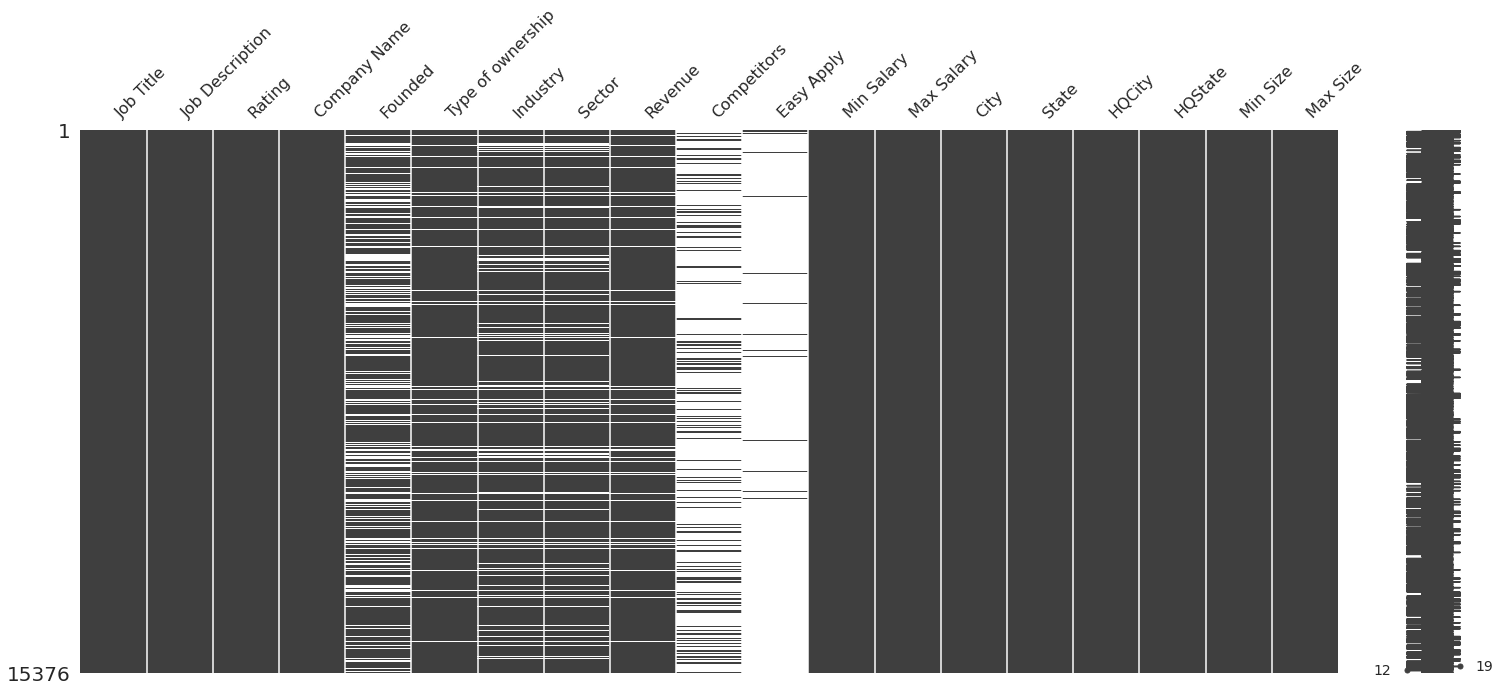

In [ ]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

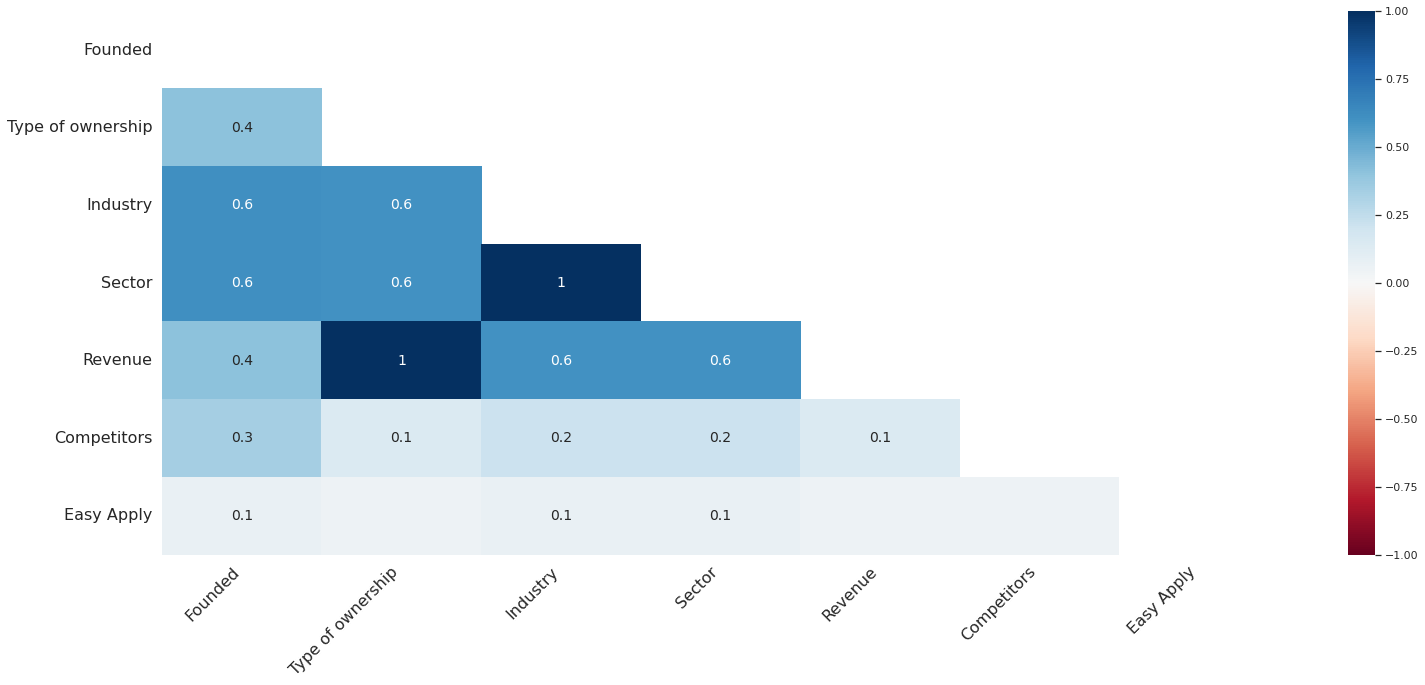

In [ ]:
#heapmap for correlation analysis
msno.heatmap(df, figsize=(25,10))

> From all of this results I see that I will drop this two columns because they have many missing valuesand we can't fill this null values with good values

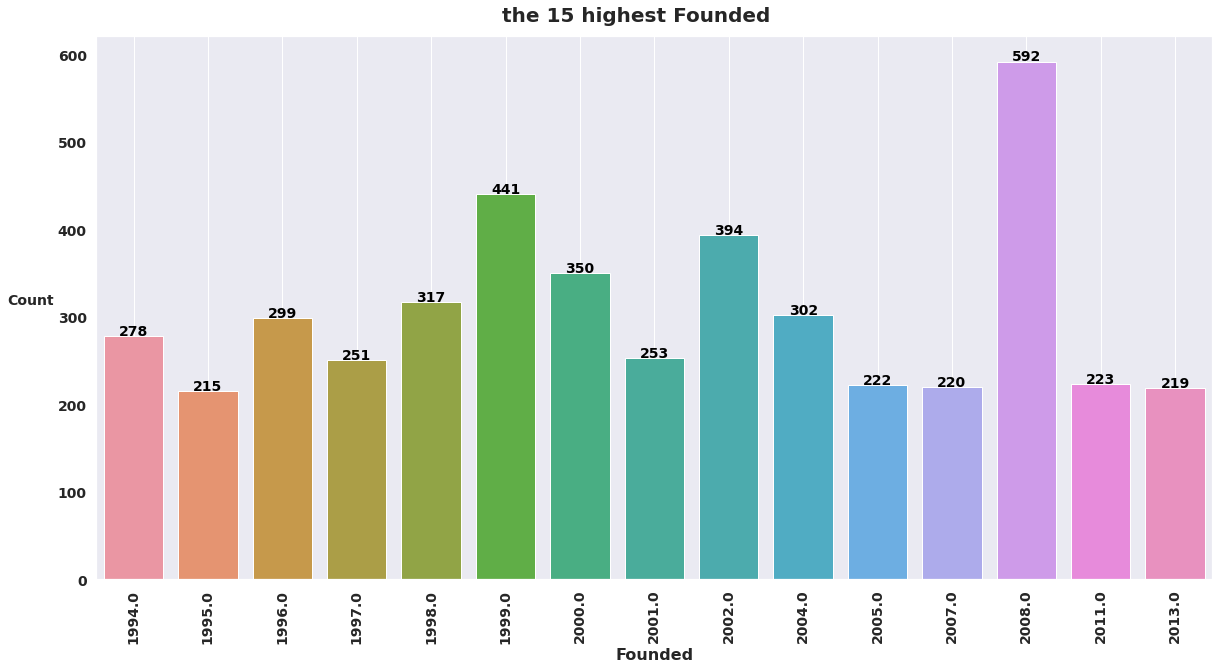

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Founded'].value_counts().head(15).index, y=df['Founded'].value_counts().head(15).values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Founded', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 15 highest Founded", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
             first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.grid()
plt.show()

In [ ]:
# drop Competitors column
df = df.drop(['Competitors'],axis = 1)

In [ ]:
# drop Founded column
df = df.drop(['Founded'],axis = 1)

> Checking for nulls

In [ ]:
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (17, 2)


Total missing  % missing
Easy Apply                 14820  96.383975
Industry                    2187  14.223465
Sector                      2184  14.203954
Type of ownership            882   5.736212
Revenue                      882   5.736212
City                           0   0.000000
Min Size                       0   0.000000
HQState                        0   0.000000
HQCity                         0   0.000000
State                          0   0.000000
Job Title                      0   0.000000
Max Salary                     0   0.000000
Min Salary                     0   0.000000
Job Description                0   0.000000
Company Name                   0   0.000000
Rating                         0   0.000000
Max Size                       0   0.000000

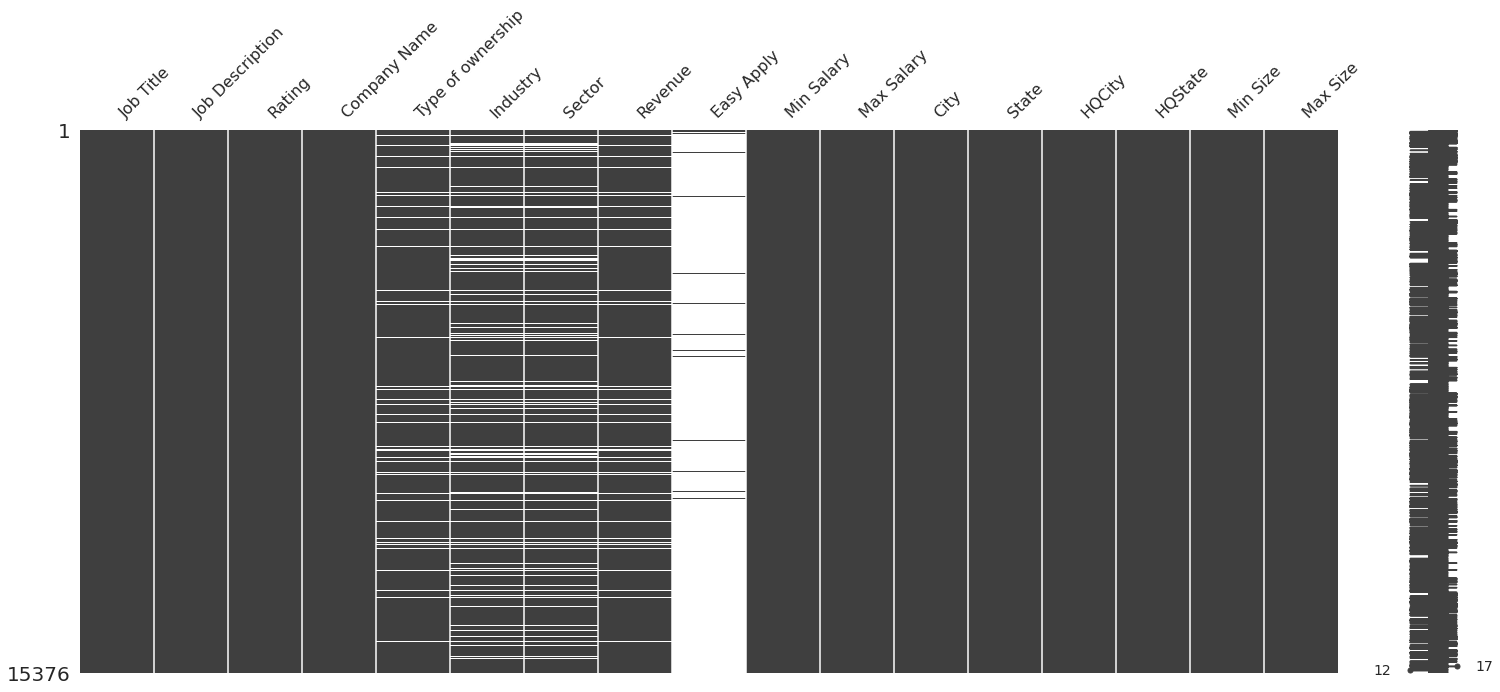

In [ ]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

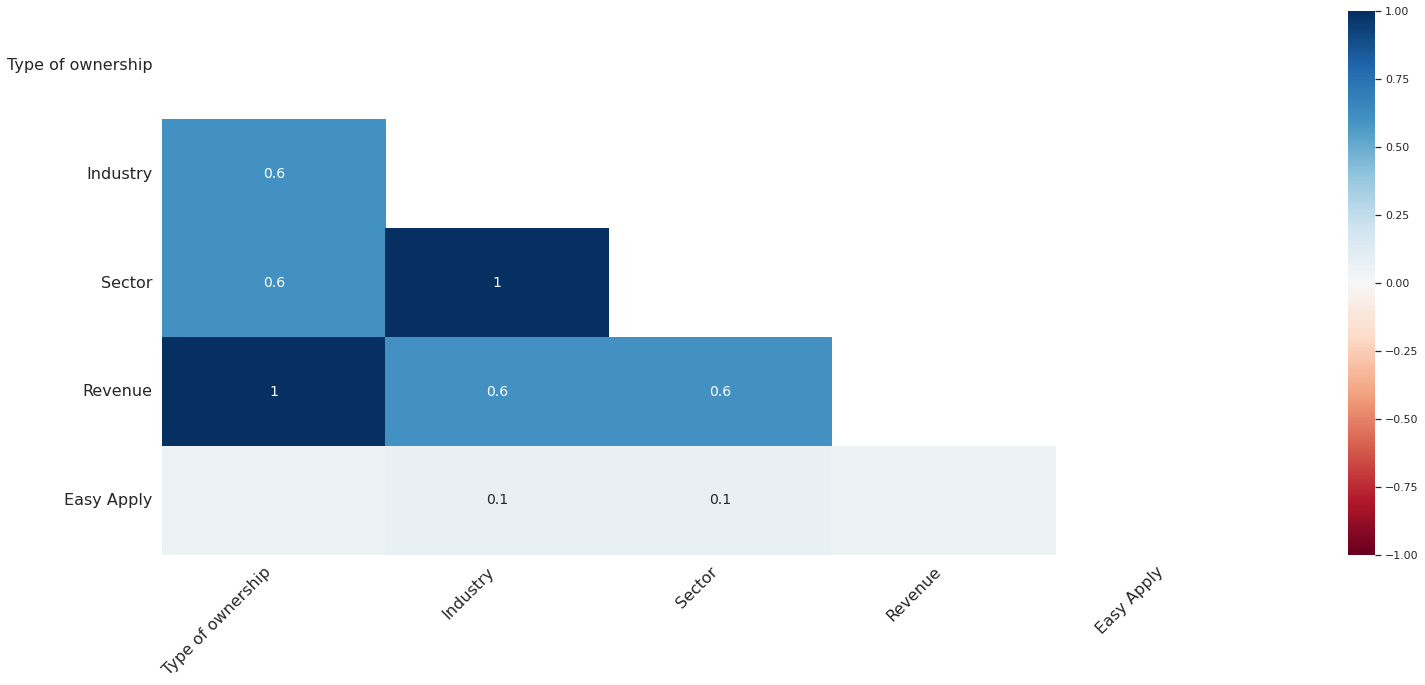

In [ ]:
#heapmap for correlation analysis
msno.heatmap(df, figsize=(25,10))

####Easy Apply	column

In [ ]:
#Checking for null values for 'Easy Apply	'columns
df['Easy Apply'].isnull().sum()

14820

In [ ]:
df['Easy Apply'].value_counts()

TRUE    556
Name: Easy Apply, dtype: int64

> As we see we have `14820` null values and we have the rest of values are `True`, So I will fill the null values with `0` and make the true values is `1`

In [ ]:
df['Easy Apply'].fillna(0, inplace = True)

In [ ]:
#replace all True values with 1
df['Easy Apply'].replace('TRUE', 1, inplace = True)
# df['Easy Apply'].astype(int)

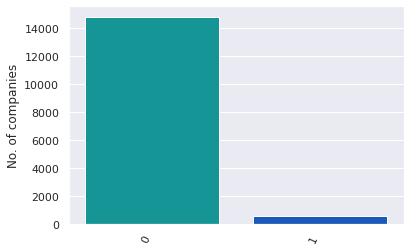

In [ ]:
dis = df['Easy Apply'].value_counts()
chart = sns.barplot(data=df, x=dis.index, y=dis.values, palette='winter_r')
chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right', fontweight='light',)
chart.axes.yaxis.label.set_text("No. of companies")

> Checking for nulls

In [ ]:
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (17, 2)


Total missing  % missing
Industry                    2187  14.223465
Sector                      2184  14.203954
Type of ownership            882   5.736212
Revenue                      882   5.736212
Job Title                      0   0.000000
City                           0   0.000000
Min Size                       0   0.000000
HQState                        0   0.000000
HQCity                         0   0.000000
State                          0   0.000000
Easy Apply                     0   0.000000
Max Salary                     0   0.000000
Min Salary                     0   0.000000
Job Description                0   0.000000
Company Name                   0   0.000000
Rating                         0   0.000000
Max Size                       0   0.000000

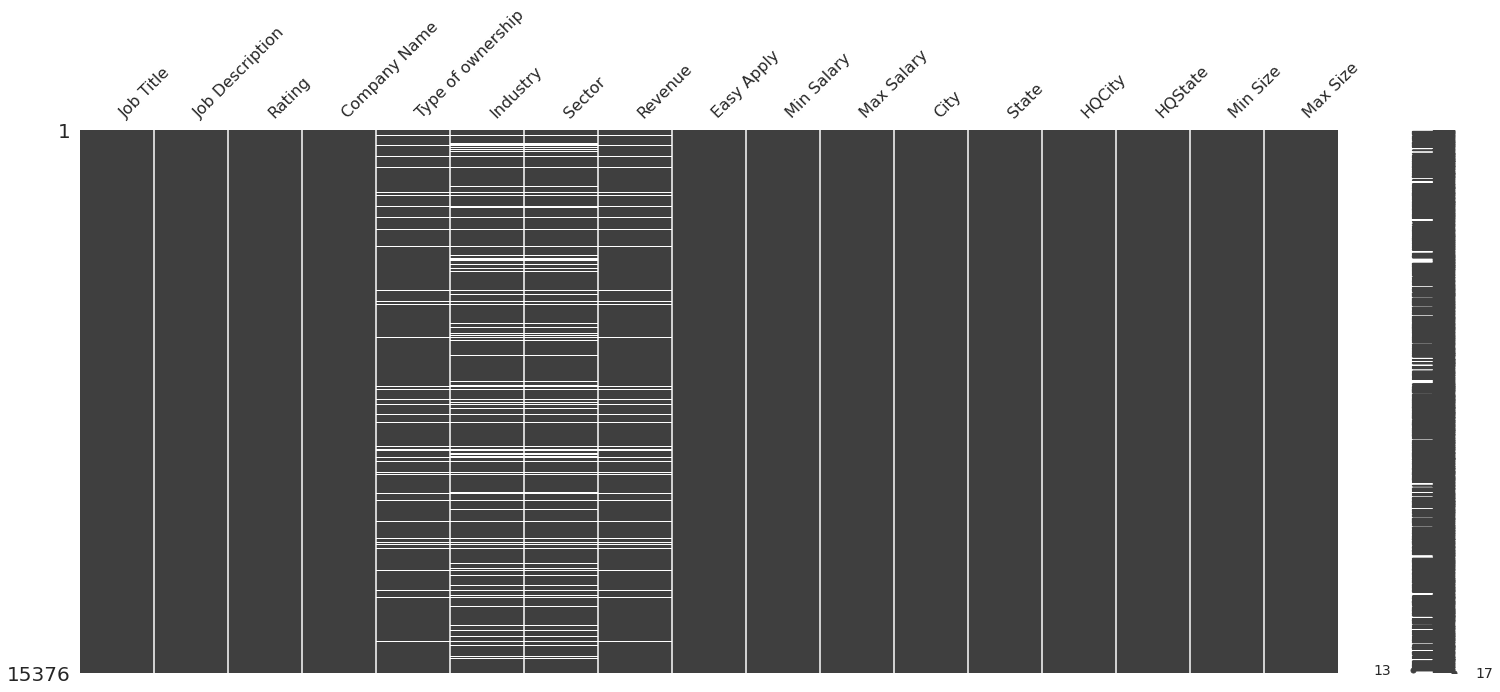

In [ ]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

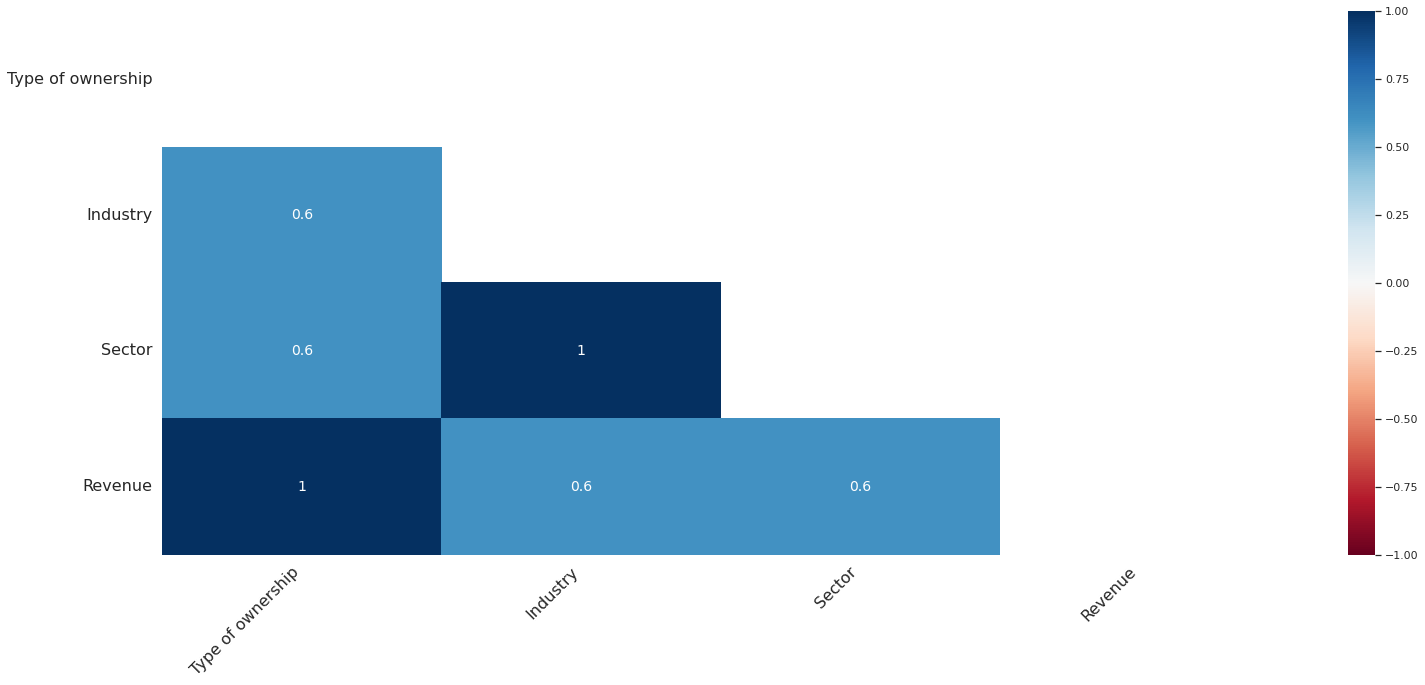

In [ ]:
#heapmap for correlation analysis
msno.heatmap(df, figsize=(25,10))

####Type of ownership column

In [ ]:
#Checking for null values for 'Easy Apply	'columns
df['Type of ownership'].isnull().sum()

882

In [ ]:
df['Type of ownership'].value_counts()

Company - Private                 8315
Company - Public                  3818
Nonprofit Organization             677
Subsidiary or Business Segment     657
Government                         310
College / University               212
Unknown                            147
Hospital                           113
Contract                            94
Other Organization                  50
Private Practice / Firm             49
School / School District            33
Self-employed                       12
Franchise                            7
Name: Type of ownership, dtype: int64

> as we see, we have `882` null values and have `147` Unknown value so we have around `1000` missing value so I will but this values with `Other Organization`

In [ ]:
#replace all unknown and nan values with Other Organization
df['Type of ownership'].replace(['Unknown', np.nan], 'Other Organization', inplace = True)
df['Type of ownership'].value_counts()

Company - Private                 8315
Company - Public                  3818
Other Organization                1079
Nonprofit Organization             677
Subsidiary or Business Segment     657
Government                         310
College / University               212
Hospital                           113
Contract                            94
Private Practice / Firm             49
School / School District            33
Self-employed                       12
Franchise                            7
Name: Type of ownership, dtype: int64

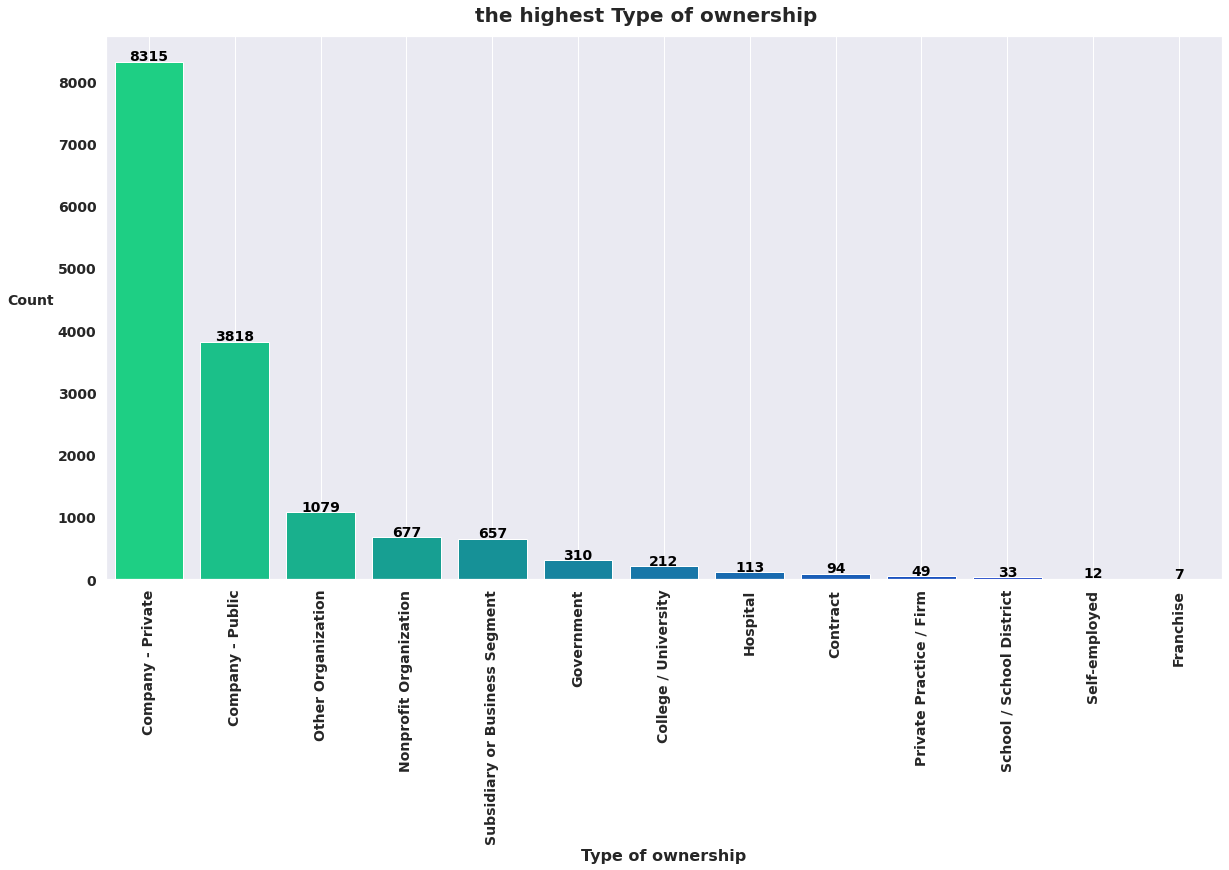

In [ ]:
#display the distibution of the values
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Type of ownership'].value_counts().index, y=df['Type of ownership'].value_counts().values, palette='winter_r')
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Type of ownership', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the highest Type of ownership", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
  first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),textcoords='offset points')
plt.grid()
plt.show()

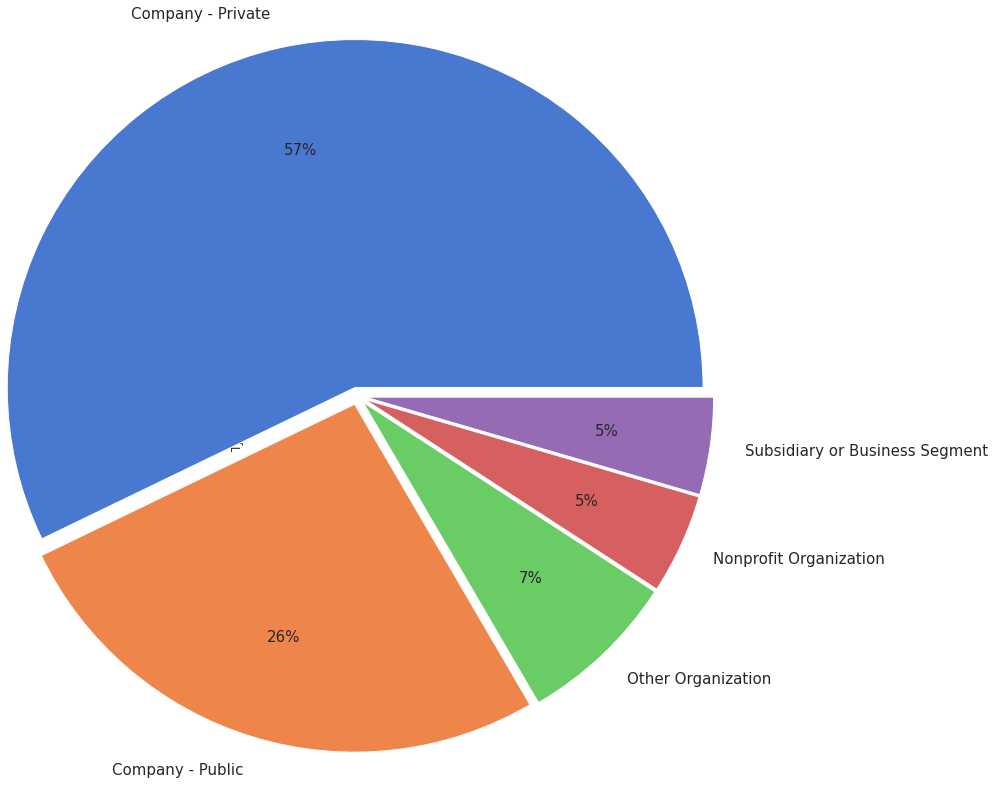

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Type of ownership'].value_counts()[:5].plot.pie(radius = 4, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

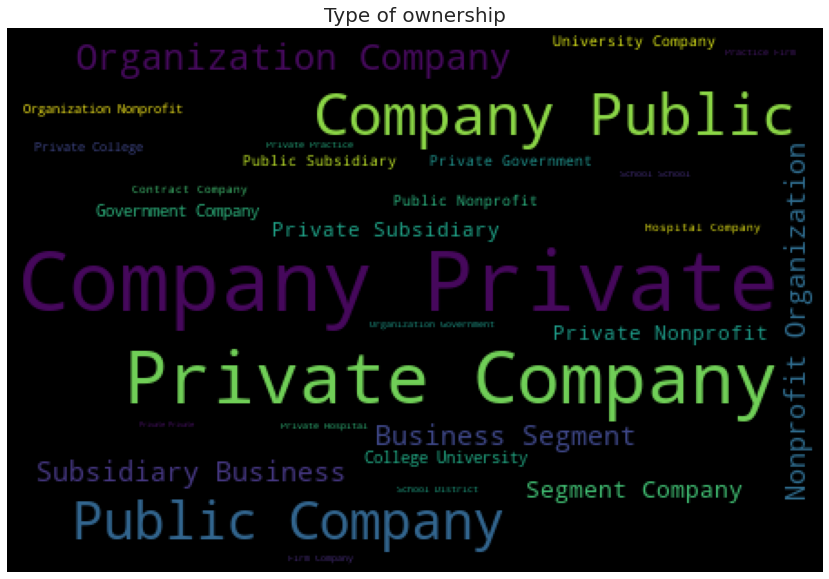

In [ ]:
#display for all the words in the Company Name column
Type = df['Type of ownership']
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Type))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title(df['Type of ownership'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [ ]:
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (17, 2)


Total missing  % missing
Industry                    2187  14.223465
Sector                      2184  14.203954
Revenue                      882   5.736212
Job Title                      0   0.000000
Max Salary                     0   0.000000
Min Size                       0   0.000000
HQState                        0   0.000000
HQCity                         0   0.000000
State                          0   0.000000
City                           0   0.000000
Easy Apply                     0   0.000000
Min Salary                     0   0.000000
Job Description                0   0.000000
Type of ownership              0   0.000000
Company Name                   0   0.000000
Rating                         0   0.000000
Max Size                       0   0.000000

####Revenue column

In [ ]:
#Checking for null values for 'Easy Apply	'columns
df['Revenue'].isnull().sum()

882

In [ ]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            4044
$10+ billion (USD)                  1855
$100 to $500 million (USD)          1545
$50 to $100 million (USD)           1261
$2 to $5 billion (USD)               869
$10 to $25 million (USD)             855
$25 to $50 million (USD)             739
$1 to $5 million (USD)               689
$1 to $2 billion (USD)               687
$5 to $10 billion (USD)              514
$500 million to $1 billion (USD)     506
Less than $1 million (USD)           491
$5 to $10 million (USD)              439
Name: Revenue, dtype: int64

> in this column I will focous only with the maximum values so I will handle the column to create new column with max value

In [ ]:
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').strip().split('to')
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').strip().split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue

In [ ]:
df['Revenue']=df['Revenue'].apply(lambda x: filter_revenue(x))

In [ ]:
df['Revenue'].value_counts()

0.0        4926
10000.0    2369
500.0      1545
100.0      1261
5000.0      869
25.0        855
50.0        739
5.0         689
2000.0      687
1000.0      506
1.0         491
10.0        439
Name: Revenue, dtype: int64

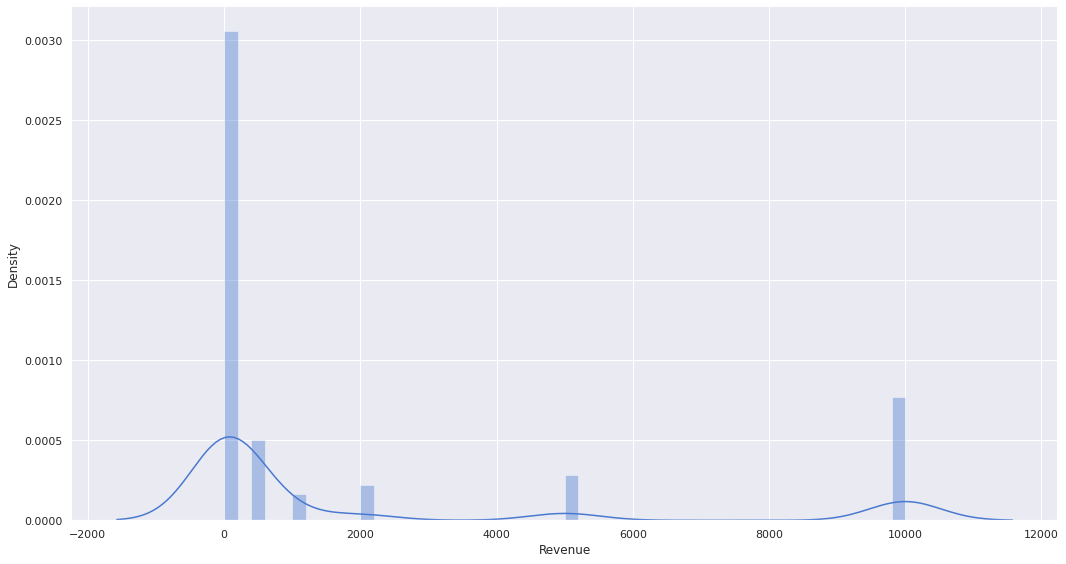

In [ ]:
sns.set(palette="muted", color_codes=True)
f, axs = plt.subplots(1, 1, figsize=(15, 8), sharex=True)
sns.despine(left=True)
#Plot a histogram and kernel density estimate
sns.distplot(df['Revenue'], color="b")
# plt.setp(axs, yticks=[])
plt.tight_layout()

> show the outliers of a variable using an histogram with a boxplot

In [ ]:
fig = px.histogram(df, x="Revenue", marginal="box")
fig.show()

#https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

> If we looking for this diagram we will find that
* q1 = 0
* median = 50
* q3 = 2000
* upper = 5000

> So I will remove values less than 0 and more than 5000

> but I can't remove this values because this value has a lot of rows

> Checking for nulls

In [ ]:
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (17, 2)


Total missing  % missing
Industry                    2187  14.223465
Sector                      2184  14.203954
Job Title                      0   0.000000
Max Salary                     0   0.000000
Min Size                       0   0.000000
HQState                        0   0.000000
HQCity                         0   0.000000
State                          0   0.000000
City                           0   0.000000
Easy Apply                     0   0.000000
Min Salary                     0   0.000000
Job Description                0   0.000000
Revenue                        0   0.000000
Type of ownership              0   0.000000
Company Name                   0   0.000000
Rating                         0   0.000000
Max Size                       0   0.000000

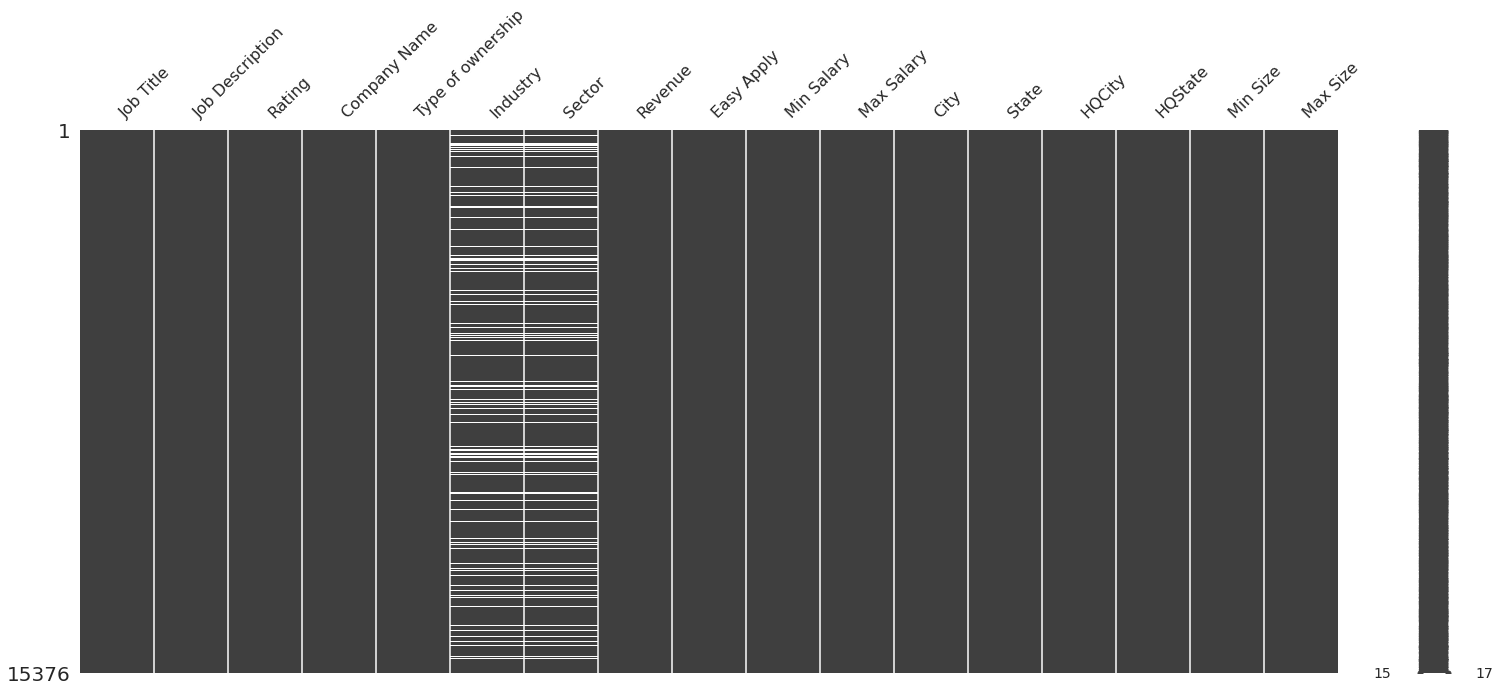

In [ ]:
#visualize missing values as a matrix
msno.matrix(df, figsize=(25,10))

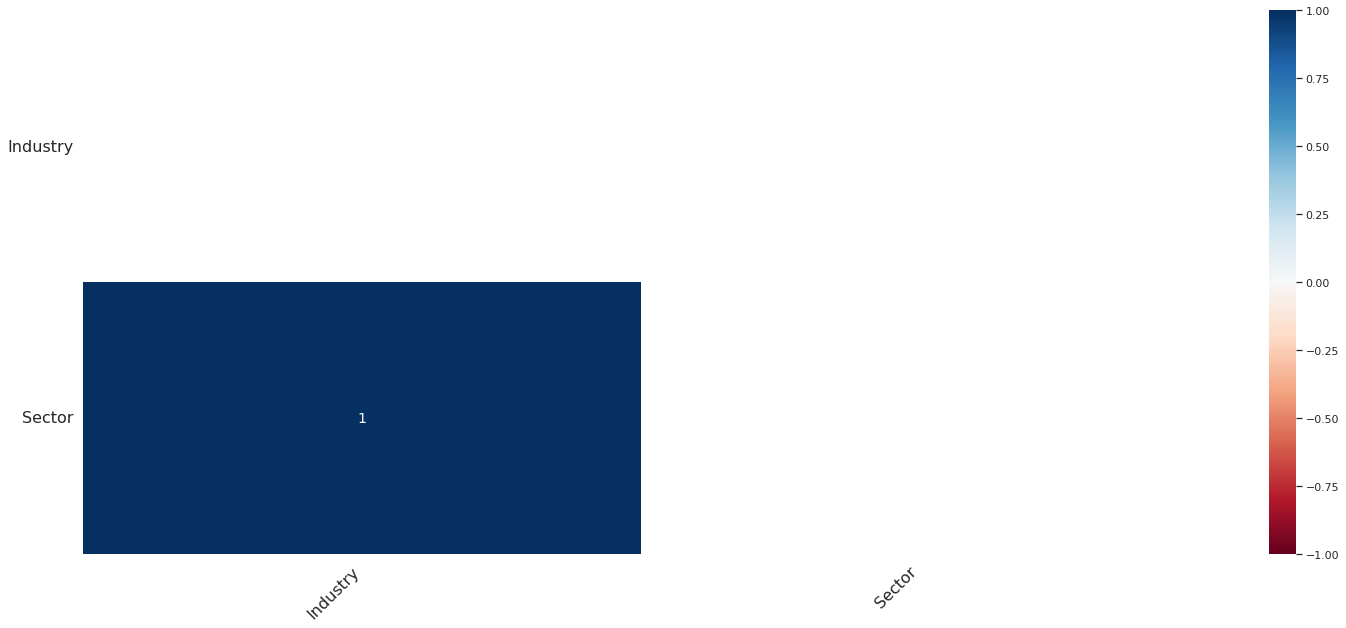

In [ ]:
#heapmap for correlation analysis
msno.heatmap(df, figsize=(25,10))

####Industry column

In [ ]:
#Checking for null values for 'Easy Apply	'columns
df['Industry'].isnull().sum()

2187

In [ ]:
df['Industry'].value_counts()

IT Services                         2217
Staffing & Outsourcing              1666
Computer Hardware & Software         921
Consulting                           884
Health Care Services & Hospitals     762
                                    ... 
Funeral Services                       1
Auto Repair & Maintenance              1
Self-Storage Services                  1
Museums, Zoos & Amusement Parks        1
Music Production & Distribution        1
Name: Industry, Length: 116, dtype: int64

In [ ]:
len(df['Industry'].unique())

117

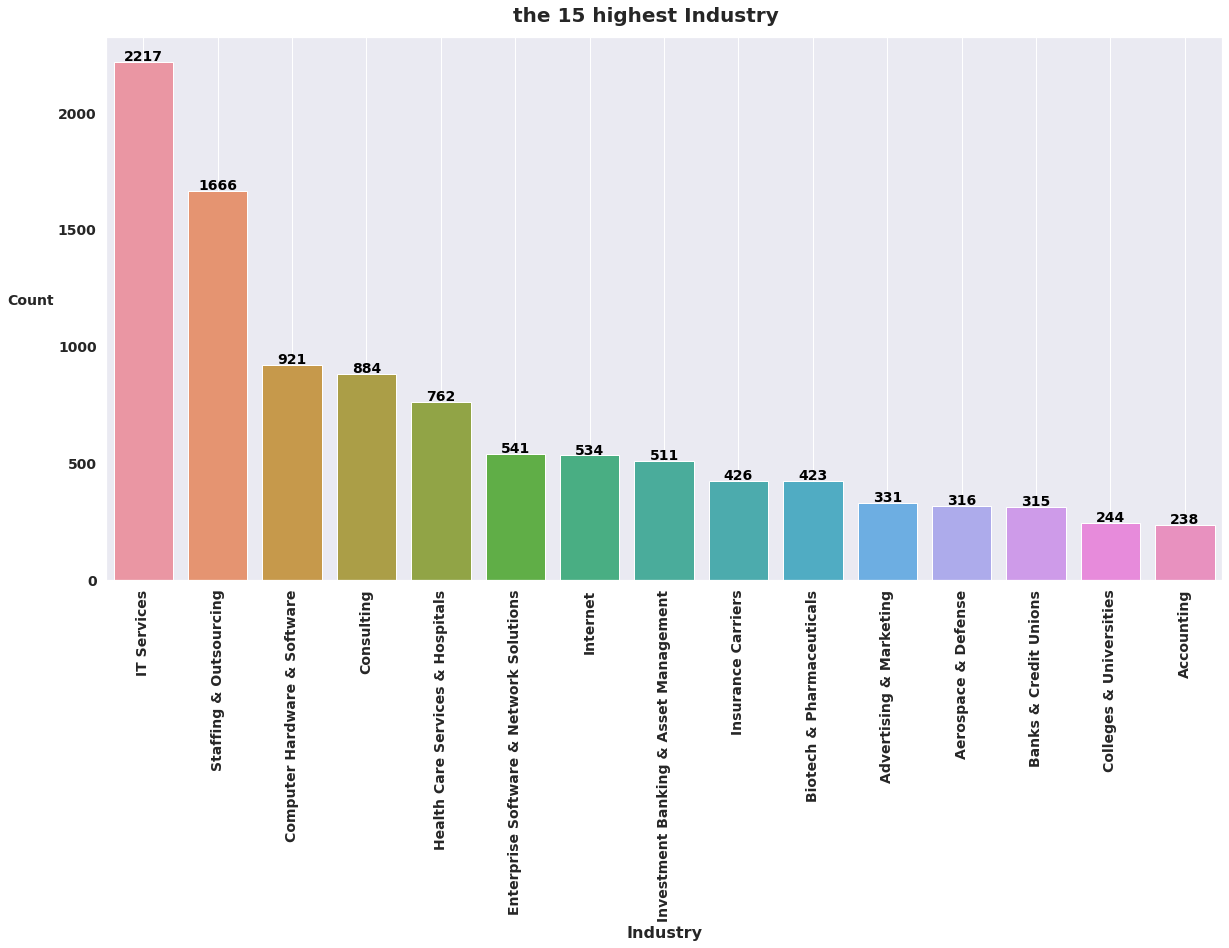

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Industry'].value_counts().head(15).index, y=df['Industry'].value_counts().head(15).values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Industry', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 15 highest Industry", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
             first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.grid()
plt.show()

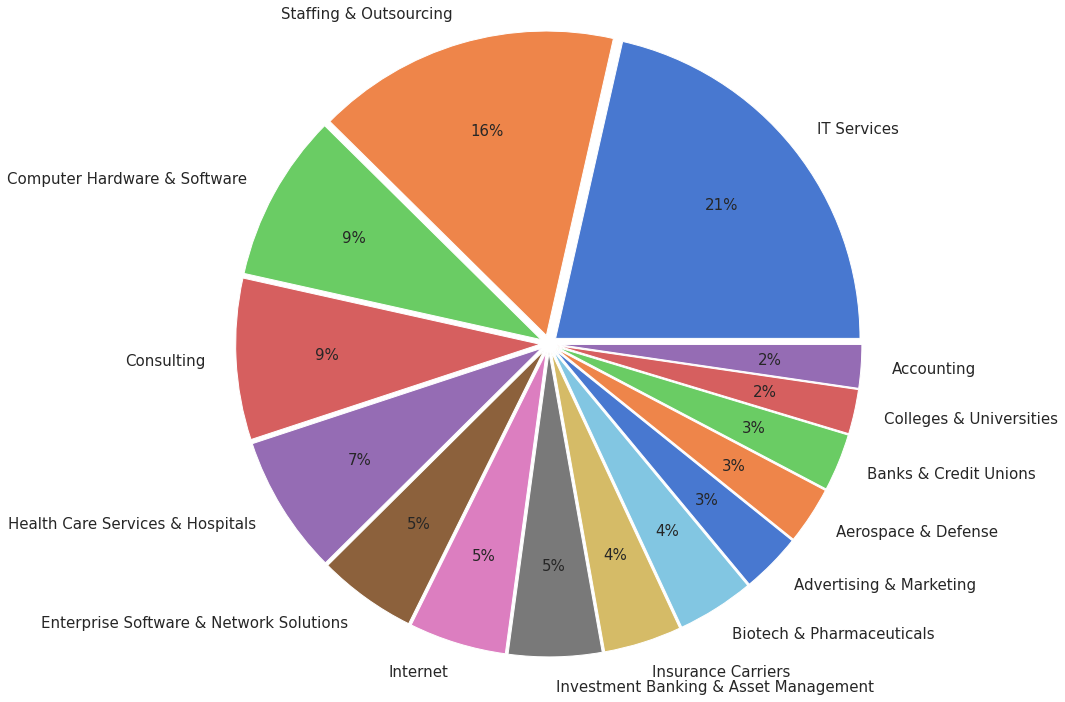

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Industry'].value_counts()[:15].plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [ ]:
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (17, 2)


Total missing  % missing
Industry                    2187  14.223465
Sector                      2184  14.203954
Job Title                      0   0.000000
Max Salary                     0   0.000000
Min Size                       0   0.000000
HQState                        0   0.000000
HQCity                         0   0.000000
State                          0   0.000000
City                           0   0.000000
Easy Apply                     0   0.000000
Min Salary                     0   0.000000
Job Description                0   0.000000
Revenue                        0   0.000000
Type of ownership              0   0.000000
Company Name                   0   0.000000
Rating                         0   0.000000
Max Size                       0   0.000000

> Here This null values I can handle it by using the Job Description column but this will need for much time and much work so I will chose the good solution for this case by using simpleImputer and fill with most frequent

In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df['Industry'] = imputer.fit_transform(df['Industry'].values.reshape(-1,1))

In [ ]:
len(df['Industry'].unique())

116

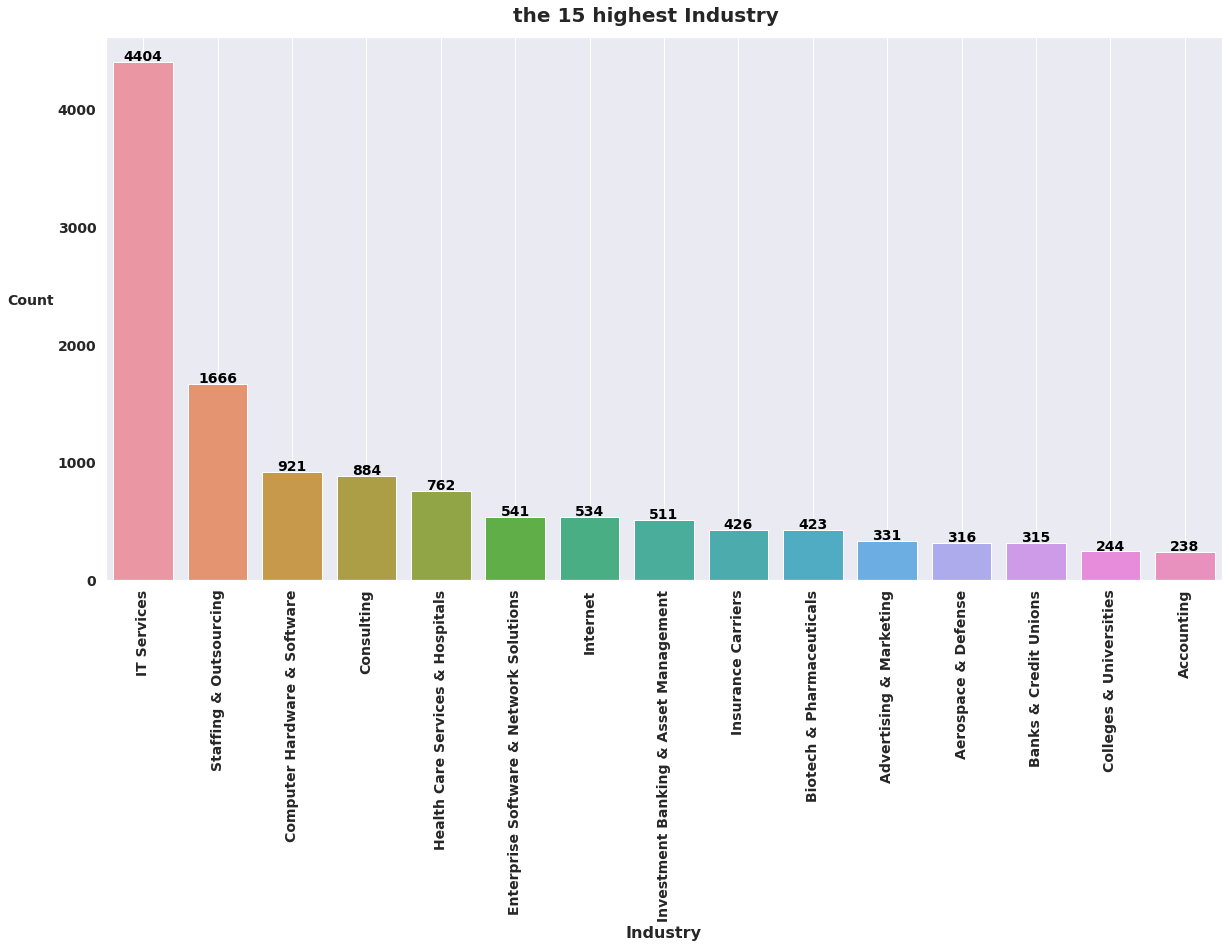

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Industry'].value_counts().head(15).index, y=df['Industry'].value_counts().head(15).values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Industry', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 15 highest Industry", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
             first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.grid()
plt.show()

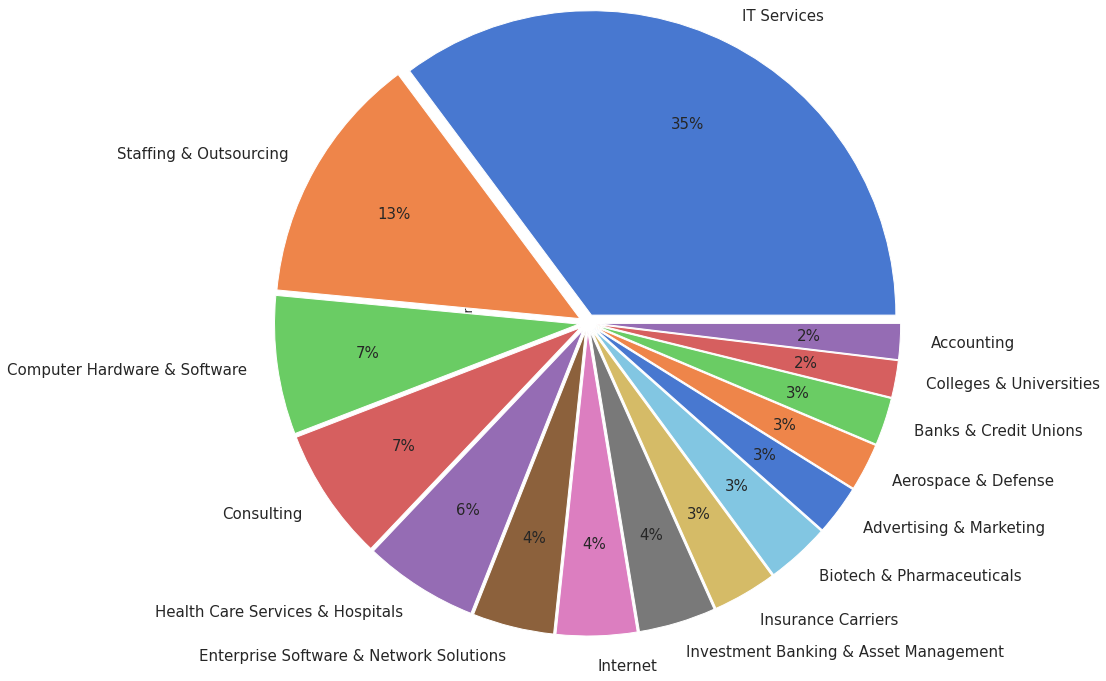

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Industry'].value_counts()[:15].plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

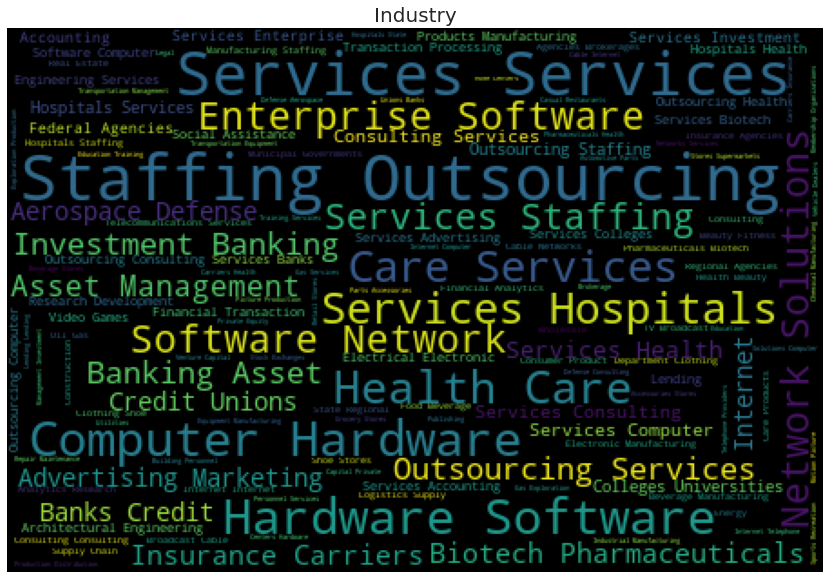

In [ ]:
#display for all the words in the job title column
Industry = df['Industry']
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Industry))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title(df['Industry'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

####sector column

In [ ]:
#Checking for null values for 'Easy Apply	'columns
df['Sector'].isnull().sum()

2184

In [ ]:
df['Sector'].value_counts()

Information Technology                4216
Business Services                     3209
Finance                               1187
Health Care                            762
Insurance                              495
Biotech & Pharmaceuticals              423
Manufacturing                          395
Government                             317
Education                              317
Aerospace & Defense                    316
Retail                                 267
Accounting & Legal                     254
Media                                  227
Oil, Gas, Energy & Utilities           167
Non-Profit                             112
Transportation & Logistics             110
Telecommunications                      95
Consumer Services                       80
Construction, Repair & Maintenance      74
Real Estate                             61
Restaurants, Bars & Food Services       41
Arts, Entertainment & Recreation        30
Travel & Tourism                        20
Agriculture

In [ ]:
len(df['Sector'].unique())

26

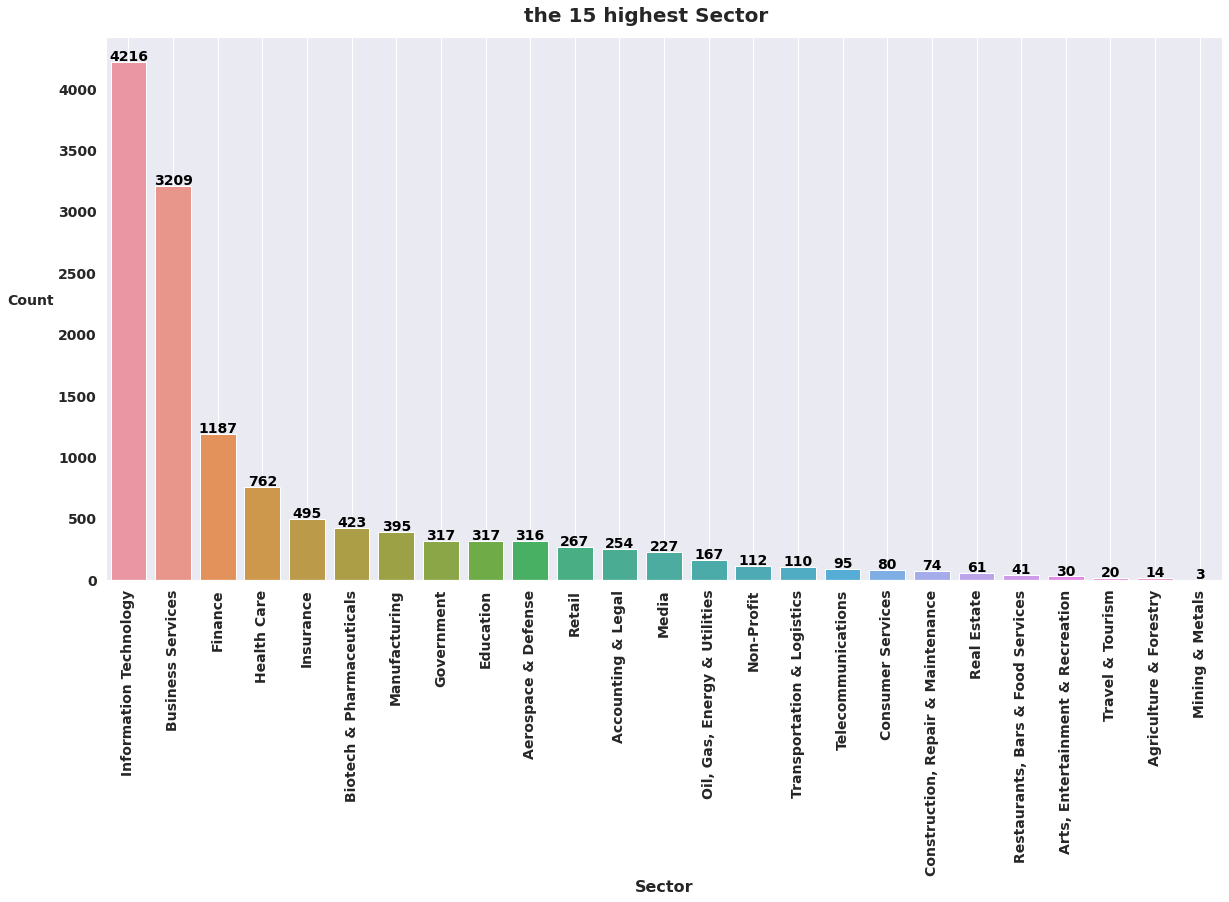

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Sector'].value_counts().index, y=df['Sector'].value_counts().values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Sector', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 15 highest Sector", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
             first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.grid()
plt.show()

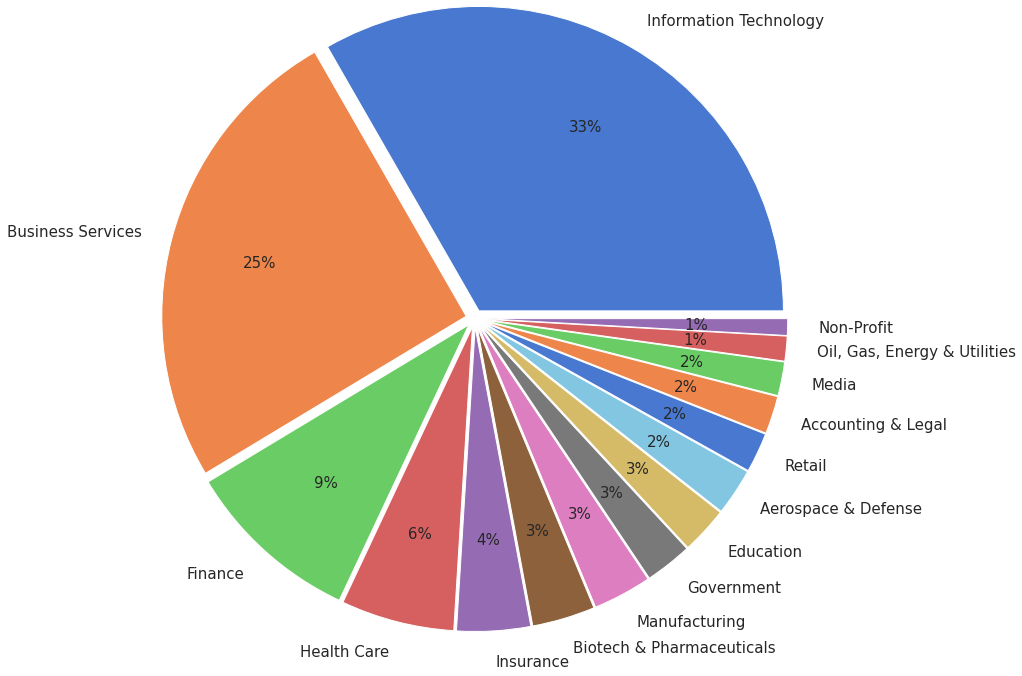

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Sector'].value_counts()[:15].plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [ ]:
# summary of the number of nulls and count the ratio of missing values
total_miss = df.isnull().sum()
percent_miss = (total_miss/df.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
print("the shape of the missing data frame: ", missing_data.shape)
missing_data.sort_values(by='Total missing',ascending=False)

the shape of the missing data frame:  (17, 2)


Total missing  % missing
Sector                      2184  14.203954
Job Title                      0   0.000000
Min Salary                     0   0.000000
Min Size                       0   0.000000
HQState                        0   0.000000
HQCity                         0   0.000000
State                          0   0.000000
City                           0   0.000000
Max Salary                     0   0.000000
Easy Apply                     0   0.000000
Job Description                0   0.000000
Revenue                        0   0.000000
Industry                       0   0.000000
Type of ownership              0   0.000000
Company Name                   0   0.000000
Rating                         0   0.000000
Max Size                       0   0.000000

> As I said before This null values I can handle it by using the Job Description column but this will need for much time and much work so I will chose the good solution for this case by using simpleImputer and fill with most frequent

In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df['Sector'] = imputer.fit_transform(df['Sector'].values.reshape(-1,1))

In [ ]:
len(df['Sector'].unique())

25

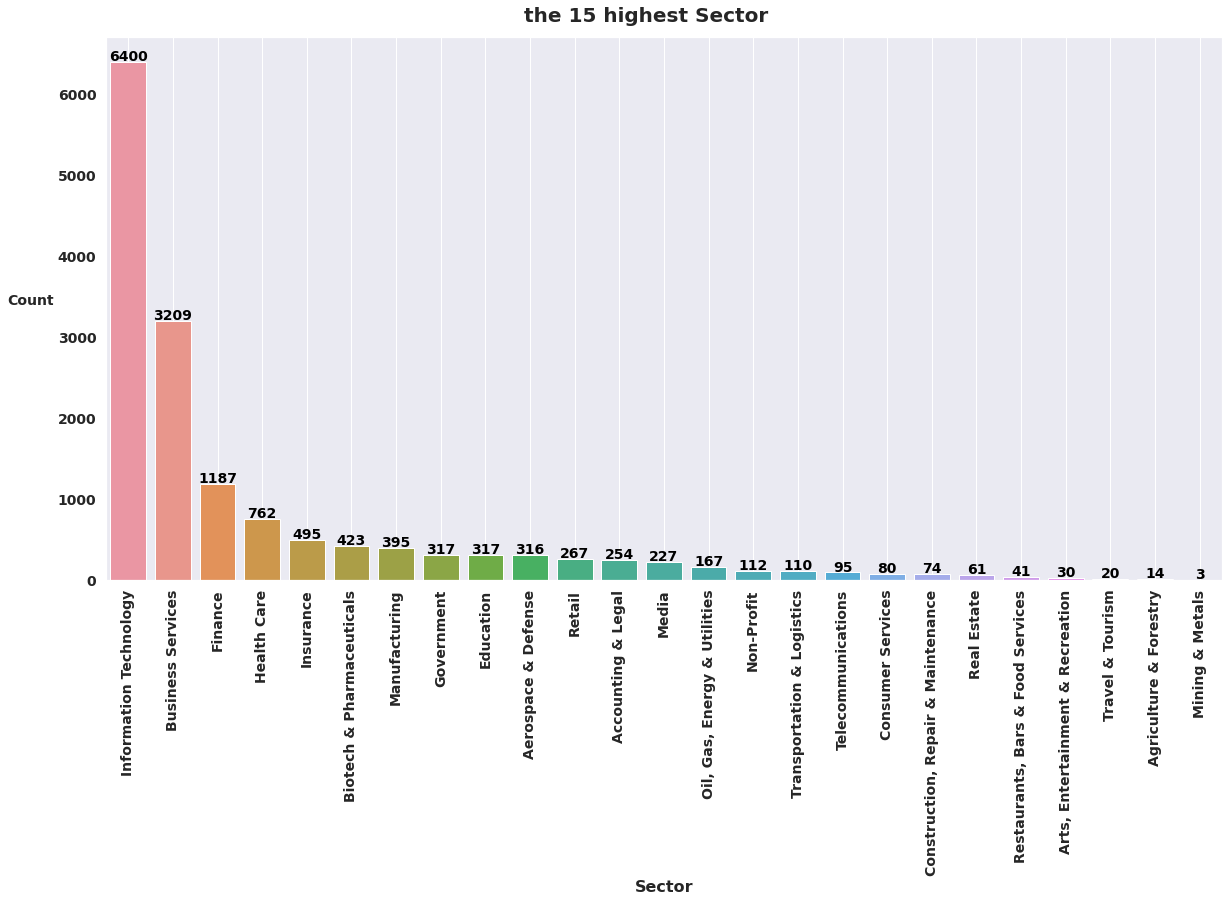

In [ ]:
plt.figure(figsize=(20,10))
first_15 = sns.barplot(x=df['Sector'].value_counts().index, y=df['Sector'].value_counts().values)
plt.xticks(rotation='90', fontsize=14, fontweight='bold')
plt.xlabel('Sector', fontsize=16, fontweight='bold')
plt.yticks(rotation='0', fontsize=14, fontweight='bold')
plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')
plt.figtext(.5,.9,"the 15 highest Sector", fontsize=20, fontweight='bold', ha='center')

for patch in first_15.patches:
             first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.grid()
plt.show()

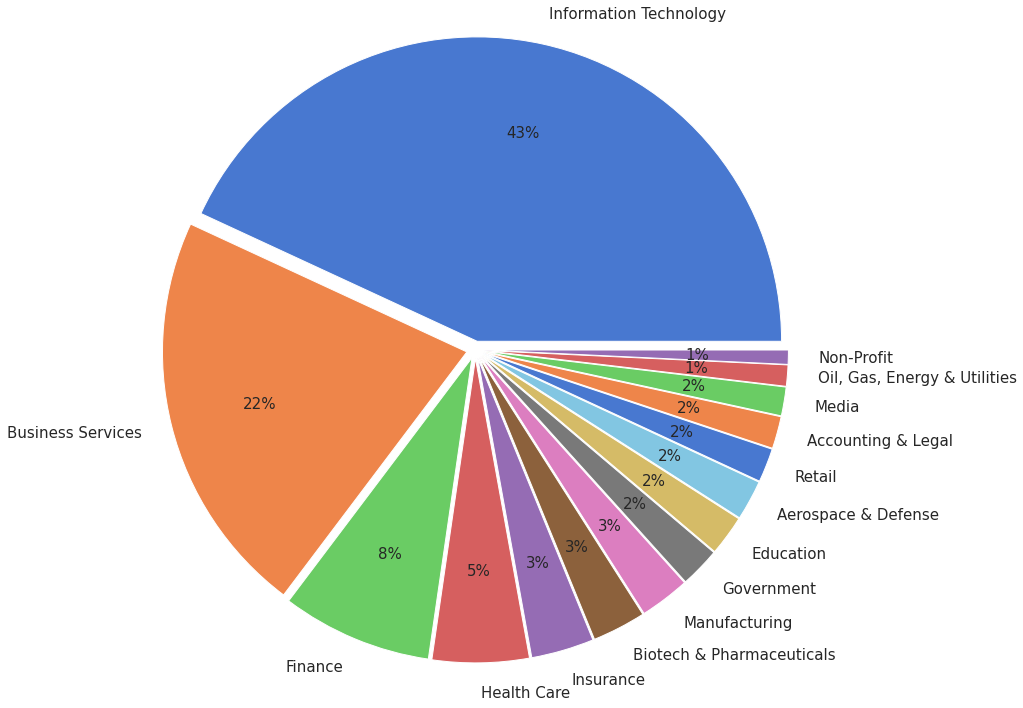

In [ ]:
#explsion
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
# Pie chart
df['Sector'].value_counts()[:15].plot.pie(radius = 3.5, autopct='%.0f%%', pctdistance=0.7, explode = explode, textprops={'fontsize': 15})
#draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

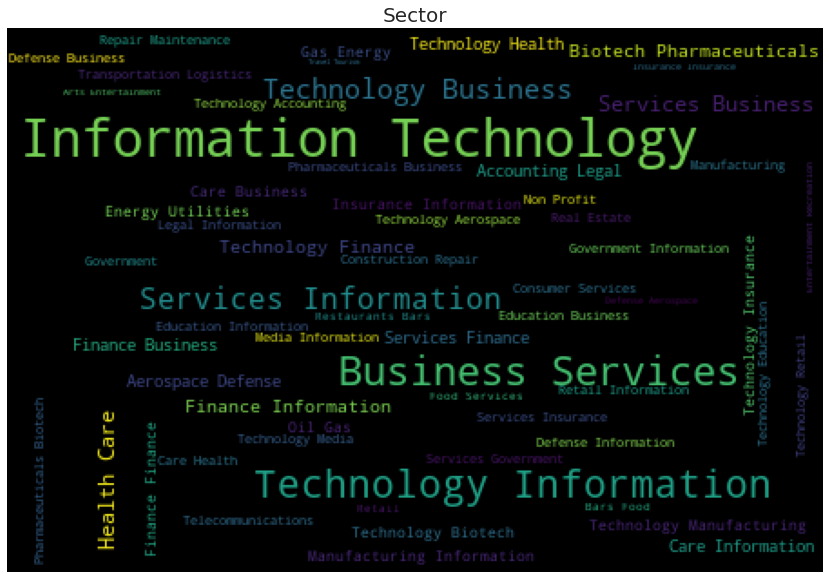

In [ ]:
#display for all the words in the job title column
Sector = df['Sector']
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Sector))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title(df['Sector'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

> **That solution for the previous two columns not the best solution but still do what we need**

#Q3)

> **`H0 null hypothesis:`**  the highest salary offerd is less than `$190K`

> **`H1 Alternative Hypothesis:`** the highest salary offerd is more than `$190K`

> if We want to prove this hypothesis with easy way this is the solution

In [ ]:
fig = px.histogram(df, x="Max Salary", marginal="box")
fig.show()

> As we see from the previous plot the maximum value is `$192K` which mean my hypothesis is true

> but now I will Perform statistical test to see the results

> ### statistical tests

> I have one sample ==> `Max Salry Column`

>Display the distribution to see it

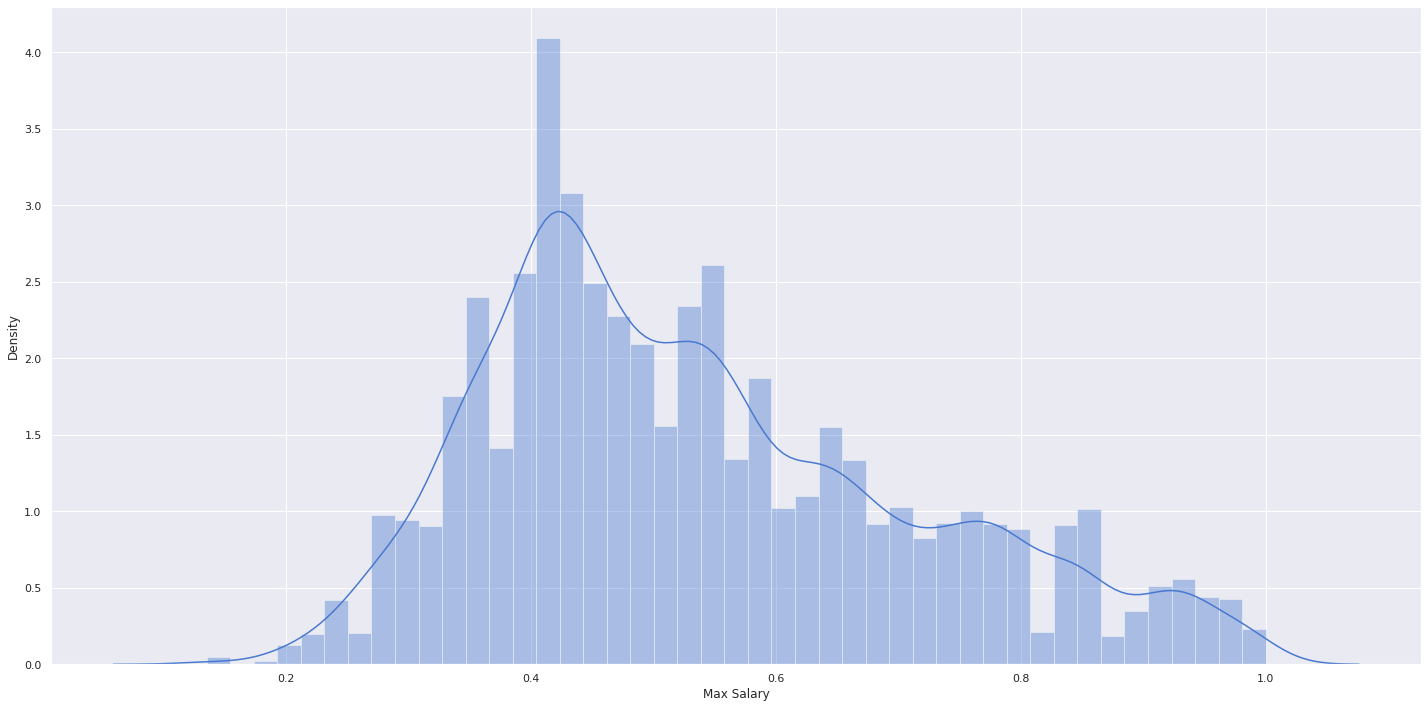

In [ ]:
plt.figure(figsize=(20,10))
sns.set(palette="muted", color_codes=True)
# f, axs = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
sns.despine(left=True)
#Plot a histogram and kernel density estimate
sns.distplot(df['Max Salary'], color="b")
# plt.setp(axs, yticks=[])
plt.tight_layout()

> From the distribution diagram it's so close to normal distribution

> One Sample Test ==> Yes

> So I will use One Sample Test

In [ ]:
df['Max Salary'].mean()

103.15738813735692

In [ ]:
stats.ttest_1samp(df['Max Salary'], 190.0)

Ttest_1sampResult(statistic=-320.9528238628252, pvalue=0.0)

In [ ]:
stats.ttest_1samp(df['Max Salary'], 0.0)

Ttest_1sampResult(statistic=381.24895503333533, pvalue=0.0)

> As we see the mean of the H0 is False so the H1 is True 

> so my hypothesis is the true one

# Q4)

> My feature engineering plan is 
* After handling all columns like
  * deal with Missing data
  * deal with outlier
* Then I will deal with Job Description Column by using `NLP` To Handle this column and to be able to train on it
* Then I will Convert all the Categorical values to Numerical by using many ways
  * the first way I used when I was have some categorical data like salary and size can be converted to numerical by split the numbers from the words as I made in the Q2 with `[Size , Salary, Revenue]` columns
  * and converting `Easy Apply` from `-1` and `True` values to `[0, 1]` values as I made in Q2
  * One Hot Encoding 
    * `[Locations]` ==> in this column I split it to `[City, State]` and I will focus with `State` and make `one hot encoding for this new column` and I drop the `[Location, City]` Columns because these three column represent the same information so i will focus with only one of them
    * `[Headquarters]` ==> in this column I split it to `[HQCity, HQState]` and I will focus with `HQState` and make `one hot encoding for this new column` and I drop the `[Headquarters, HQCity]` Columns because these three column represent the same information so i will focus with only one of them
    * `[Type of ownership]` ==> I will use one hot encoding with this column
    * I will use this approache with all of thes columns because the have few unique values so it's easy to convert this to one hot encoding
  * target encoding
    * `[Industry , Sector, , Job Title]` because they have so many uique values
* Then I will drop some columns Like 
  * `[Founded , Competitors]` because they have so many missing values
* Then I will use Stander Scaler To Normalize all data to be in the same range of values
* Then I will chose the best Columns For training and drop the other columns which i don't need them 


#Resources

[R](https://www.datacamp.com/community/tutorials/categorical-data)

[R](https://dzone.com/articles/imputing-missing-data-using-sklearn-simpleimputer#:~:text=SimpleImputer%20is%20a%20class%20found,creating%20an%20instance%20of%20SimpleImputer.)

[R](https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/)

[R](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)

[R](https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32)

[R](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)

[R]( https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/)


[R]( https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643)

[R](https://stackoverflow.com/questions/61666884/after-deletion-outliers-near-maximum-remaining-in-r-boxplot)

[R](https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs)

[R](https://statisticsbyjim.com/basics/remove-outliers/)

[R]( https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/)

[R](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)
